### The first analysis we are to carry out is the Chicago Crimes 2008 to 2011

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Chicago_Crimes_1_4 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv")
try:
    df = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")

df.head(-50)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688655,6218355,10799732,HZ570000,10/15/2010 10:00:00 AM,007XX N CENTRAL PARK AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER,False,...,27.0,23.0,11,NaN,NaN,2010,12/31/2016 03:47:04 PM,NaN,NaN,NaN
2688656,6219285,10802172,JA101272,09/24/2009 09:00:00 AM,076XX N SHERIDAN RD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,...,49.0,1.0,11,NaN,NaN,2009,01/02/2017 03:51:13 PM,NaN,NaN,NaN
2688657,6220986,10803653,JA102764,06/01/2011 12:00:00 PM,044XX S WESTERN AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,...,12.0,61.0,02,NaN,NaN,2011,01/04/2017 03:47:19 PM,NaN,NaN,NaN
2688658,6221765,10805196,JA103833,05/01/2010 12:00:00 PM,0000X W WASHINGTON ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,FEDERAL BUILDING,False,...,42.0,32.0,11,NaN,NaN,2010,01/05/2017 03:54:54 PM,NaN,NaN,NaN


### Checking if some rows that have unique numbers are duplicated and removing them

In [3]:
df = df.drop_duplicates(subset=['ID', 'Case Number'], keep="first")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541215 entries, 0 to 2688709
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1541215 non-null  int64  
 1   ID                    1541215 non-null  int64  
 2   Case Number           1541212 non-null  object 
 3   Date                  1541215 non-null  object 
 4   Block                 1541215 non-null  object 
 5   IUCR                  1541215 non-null  object 
 6   Primary Type          1541215 non-null  object 
 7   Description           1541215 non-null  object 
 8   Location Description  1540941 non-null  object 
 9   Arrest                1541215 non-null  bool   
 10  Domestic              1541215 non-null  bool   
 11  Beat                  1541215 non-null  int64  
 12  District              1541173 non-null  float64
 13  Ward                  1541176 non-null  float64
 14  Community Area        1540386 non-null 

In [5]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 3
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      274
Arrest                      0
Domestic                    0
Beat                        0
District                   42
Ward                       39
Community Area            829
FBI Code                    0
X Coordinate            15653
Y Coordinate            15653
Year                        0
Updated On                  0
Latitude                15653
Longitude               15653
Location                15653
dtype: int64

In [6]:
df.Description.value_counts()

Description
SIMPLE                            154728
DOMESTIC BATTERY SIMPLE           130303
$500 AND UNDER                    103243
TO VEHICLE                         85190
POSS: CANNABIS 30GMS OR LESS       84337
                                   ...  
LOTTERY/OTHER                          1
DISCLOSE DV VICTIM LOCATION            1
LOTTERY/PARI-MUTUEL                    1
CALCULATED CANNABIS CONSPIRACY         1
RECKLESS HOMICIDE                      1
Name: count, Length: 335, dtype: int64

In [7]:
df.Beat.value_counts()

Beat
423     12430
421     12175
624     11647
511     11183
823     11102
        ...  
235        17
1225       16
1214       13
430        10
1215        3
Name: count, Length: 303, dtype: int64

Text(0.5, 0, 'Ward  %')

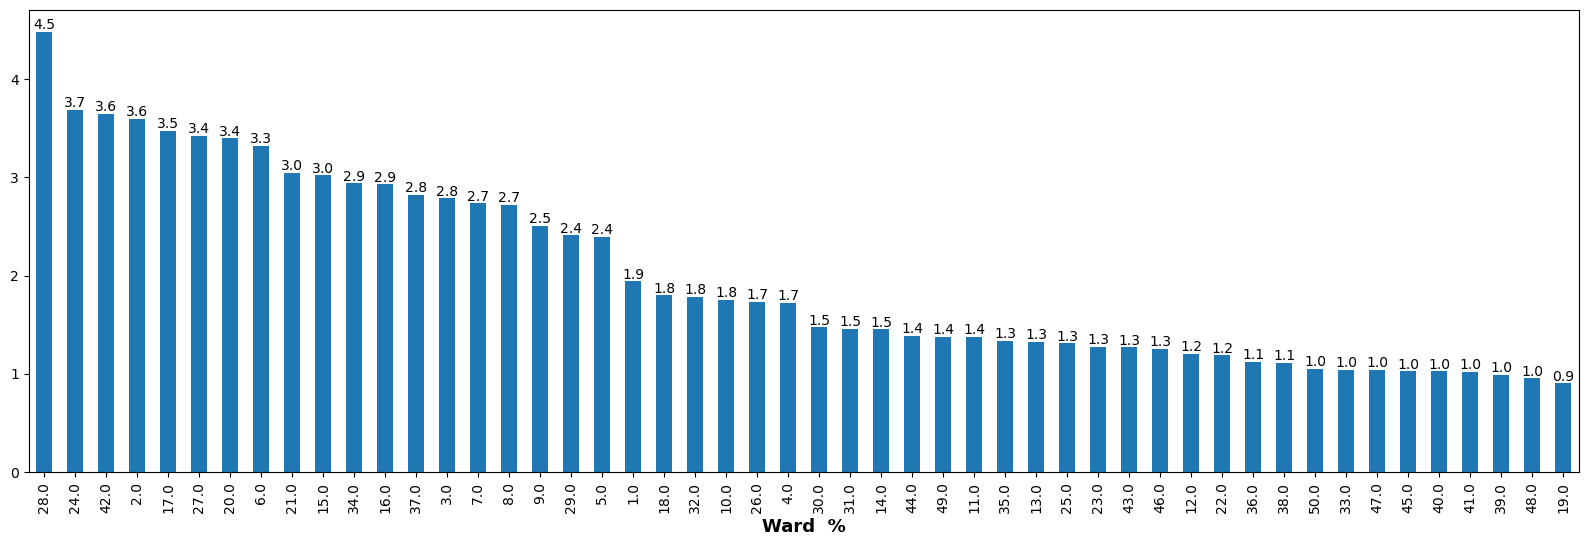

In [8]:
ward = df.Ward.value_counts(normalize = True)*100
bars = ward.plot(kind = "bar", figsize = (20, 6))
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge')
plt.xlabel("Ward  %", fontsize = 13, fontweight = "bold")

### important notes for data cleaning 

1. remove the following columns [`longitude`, `latitude`, `location`, `x-cordinate`, `y-cordinate`, etc] because the ward shows the exact location of where they took place. the X and Y coordinate of a row can be converted to it relative longitude and latitude which in turn can changed to chicago ward location


In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [10]:
print (df.Location[1]) 
print (df["X Coordinate"][1], df["Y Coordinate"][1])

(41.87025207, -87.746069362)
1144200.0 1895857.0


In [11]:
df.shape

(1541215, 23)

In [12]:
df.Ward.isnull().sum()

39

In [13]:
df.Ward.head()

0     6.0
1    24.0
2    18.0
3    37.0
4    22.0
Name: Ward, dtype: float64

In [14]:
df.District.value_counts().sort_index()

District
1.0      53616
2.0      65773
3.0      80227
4.0      90596
5.0      69448
6.0      91404
7.0      94725
8.0     111272
9.0      77286
10.0     64659
11.0     93260
12.0     72594
14.0     60861
15.0     69242
16.0     51872
17.0     45921
18.0     63517
19.0     67190
20.0     25177
22.0     52258
23.0         1
24.0     46151
25.0     94058
31.0        65
Name: count, dtype: int64

In [15]:
df.Block.value_counts().sort_index()

Block
0000X E 100TH PL         162
0000X E 100TH ST          89
0000X E 101ST PL          81
0000X E 101ST ST         121
0000X E 102ND PL         170
                        ... 
139XX S ATLANTIC           1
145XX S MINERVA            1
173XX  LORENZ              1
175XX S SANDALWOOD DR      1
XX  UNKNOWN                2
Name: count, Length: 32157, dtype: int64

In [16]:
df_filtered = df[pd.isna(df['Ward'])]
df_filtered

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
13614,828784,8389450,HT622044,04/15/2008 03:00:00 PM,081XX W CATHERINE AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,NaN,0.0,06,NaN,NaN,2008,08/17/2015 03:03:40 PM,NaN,NaN,NaN
155995,1030418,6249350,HP324959,05/04/2008 01:00:00 PM,058XX N RIVER RD,0820,THEFT,$500 AND UNDER,CTA GARAGE / OTHER PROPERTY,False,...,NaN,NaN,06,1112570.0,1936925.0,2008,02/04/2016 06:33:39 AM,41.983484,-87.861366,"(41.98348393, -87.86136622)"
178497,1052920,6283588,HP373211,06/03/2008 03:45:00 PM,056XX N FAIRVIEW AVE,0820,THEFT,$500 AND UNDER,STREET,False,...,NaN,10.0,06,1119952.0,1936788.0,2008,02/04/2016 06:33:39 AM,41.982993,-87.834219,"(41.982993154, -87.834218775)"
291010,1165433,6466672,HP545558,08/30/2008 12:00:00 PM,081XX W CATHERINE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,...,NaN,5.0,14,1120937.0,1934726.0,2008,02/04/2016 06:33:39 AM,41.977319,-87.830641,"(41.977318988, -87.830640566)"
577502,1451925,6933621,HR339293,05/23/2009 10:00:00 PM,081XX W CATHERINE AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,...,NaN,5.0,26,1121074.0,1934730.0,2009,02/04/2016 06:33:39 AM,41.977328,-87.830137,"(41.977327757, -87.830136655)"
652215,1526638,7049927,HR453532,07/28/2009 05:00:00 PM,065XX N MANNHEIM RD,1330,CRIMINAL TRESPASS,TO LAND,OTHER,True,...,NaN,NaN,26,1106264.0,1941887.0,2009,02/04/2016 06:33:39 AM,41.997193,-87.884464,"(41.997193305, -87.884463632)"
832497,1706920,7324114,HS120853,01/14/2010 11:15:00 AM,005XX W OHARE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT EXTERIOR - NON-SECURE AREA,False,...,NaN,76.0,14,1107552.0,1930183.0,2010,02/04/2016 06:33:39 AM,41.965057,-87.879953,"(41.965057367, -87.879953326)"
837481,1711904,7332426,HS130043,01/20/2010 03:00:00 PM,005XX W OHARE ST,0820,THEFT,$500 AND UNDER,AIRPORT PARKING LOT,False,...,NaN,76.0,06,1107552.0,1930183.0,2010,02/04/2016 06:33:39 AM,41.965057,-87.879953,"(41.965057367, -87.879953326)"
839246,1713669,7335751,HS131757,01/21/2010 06:00:00 PM,005XX W OHARE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,...,NaN,76.0,14,1107552.0,1930183.0,2010,02/04/2016 06:33:39 AM,41.965057,-87.879953,"(41.965057367, -87.879953326)"
842824,1717247,7342453,HS138824,12/30/2009 12:00:00 PM,005XX W OHARE ST,0820,THEFT,$500 AND UNDER,AIRPORT PARKING LOT,False,...,NaN,76.0,06,1107552.0,1930183.0,2009,02/04/2016 06:33:39 AM,41.965057,-87.879953,"(41.965057367, -87.879953326)"


In [17]:
wa = df.dropna(subset = ["Ward"])
wa.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


#### 1. We have over 1 million rows in the data set. and from random sampling, we can use a certain percentage of the total number of row
#### 2. there are columns that the ward number is missing and ward is one of the key column in the dataset.

### So the fist set of analysis, we will remove the rows that the wards are `nan`

In [18]:
# getting a copy of the dataset
df1 = df
df1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [19]:
df1 = df1.dropna(subset = ["Ward"])
df1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541176 entries, 0 to 2688709
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1541176 non-null  int64  
 1   ID                    1541176 non-null  int64  
 2   Case Number           1541173 non-null  object 
 3   Date                  1541176 non-null  object 
 4   Block                 1541176 non-null  object 
 5   IUCR                  1541176 non-null  object 
 6   Primary Type          1541176 non-null  object 
 7   Description           1541176 non-null  object 
 8   Location Description  1540902 non-null  object 
 9   Arrest                1541176 non-null  bool   
 10  Domestic              1541176 non-null  bool   
 11  Beat                  1541176 non-null  int64  
 12  District              1541134 non-null  float64
 13  Ward                  1541176 non-null  float64
 14  Community Area        1540349 non-null 

In [21]:
# visualize the last updated time 
df1["Case Number"].value_counts()

Case Number
HS256531    5
HP296582    5
HS496074    4
HS269432    3
HT576362    3
           ..
HR236730    1
HR237185    1
HR237170    1
HR237153    1
HP612847    1
Name: count, Length: 1541085, dtype: int64

#### Removing columns that are not needed in the analysis. they include;
1. X coordinate
2. Y coordinate
3. updated on
4. latitude
5. longitude
6. location
7. Unnamed
8. ID
9. Case Number

##### Note: the columns are used to get the wards of the dataset

In [22]:
df1 = df1.drop(columns  = ["X Coordinate", "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "ID", "Case Number", "Unnamed: 0"])
df1.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year
0,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,323,3.0,6.0,69.0,01A,2008
1,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,1533,15.0,24.0,25.0,01A,2008
2,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,831,8.0,18.0,66.0,01A,2008
3,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,1524,15.0,37.0,25.0,01A,2008
4,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,1032,10.0,22.0,30.0,01A,2008


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541176 entries, 0 to 2688709
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1541176 non-null  object 
 1   Block                 1541176 non-null  object 
 2   IUCR                  1541176 non-null  object 
 3   Primary Type          1541176 non-null  object 
 4   Description           1541176 non-null  object 
 5   Location Description  1540902 non-null  object 
 6   Arrest                1541176 non-null  bool   
 7   Domestic              1541176 non-null  bool   
 8   Beat                  1541176 non-null  int64  
 9   District              1541134 non-null  float64
 10  Ward                  1541176 non-null  float64
 11  Community Area        1540349 non-null  float64
 12  FBI Code              1541176 non-null  object 
 13  Year                  1541176 non-null  int64  
dtypes: bool(2), float64(3), int64(2), objec

# EDA

##### year counts to know the crime rate in a space of 5 years (2001 - 2004)

In [24]:
cmap = plt.get_cmap('tab20c')
categories = df1.Year.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


In [25]:
df1.Year.value_counts()

Year
2008    426960
2009    392553
2010    370122
2011    351541
Name: count, dtype: int64

From the graph distribution, the crime rate increases each year


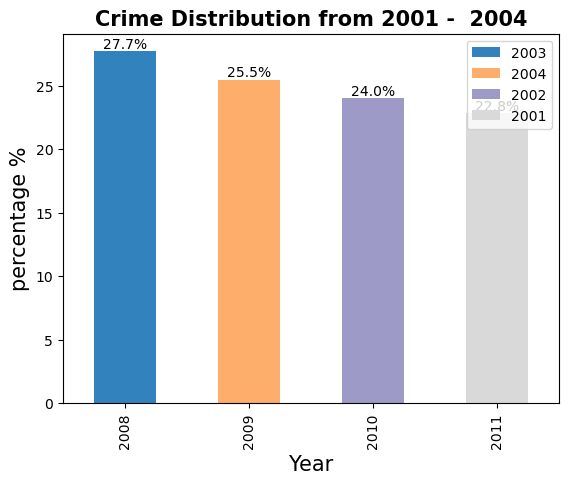

In [26]:
count = df1.Year.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors)
plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("Crime Distribution from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);

print("From the graph distribution, the crime rate increases each year")

#### ward distribution where the crimes occurs

In [27]:
df1.Ward.value_counts()

Ward
28.0    69139
24.0    56904
42.0    56220
2.0     55491
17.0    53524
27.0    52831
20.0    52383
6.0     51204
21.0    46925
15.0    46578
34.0    45308
16.0    45157
37.0    43465
3.0     42952
7.0     42182
8.0     41936
9.0     38662
29.0    37136
5.0     36934
1.0     29934
18.0    27727
32.0    27448
10.0    27037
26.0    26665
4.0     26490
30.0    22663
31.0    22459
14.0    22363
44.0    21303
49.0    21231
11.0    21148
35.0    20539
13.0    20395
25.0    20162
23.0    19574
43.0    19523
46.0    19337
12.0    18471
22.0    18283
36.0    17250
38.0    17127
50.0    16152
33.0    15995
47.0    15950
45.0    15788
40.0    15781
41.0    15721
39.0    15179
48.0    14669
19.0    13881
Name: count, dtype: int64

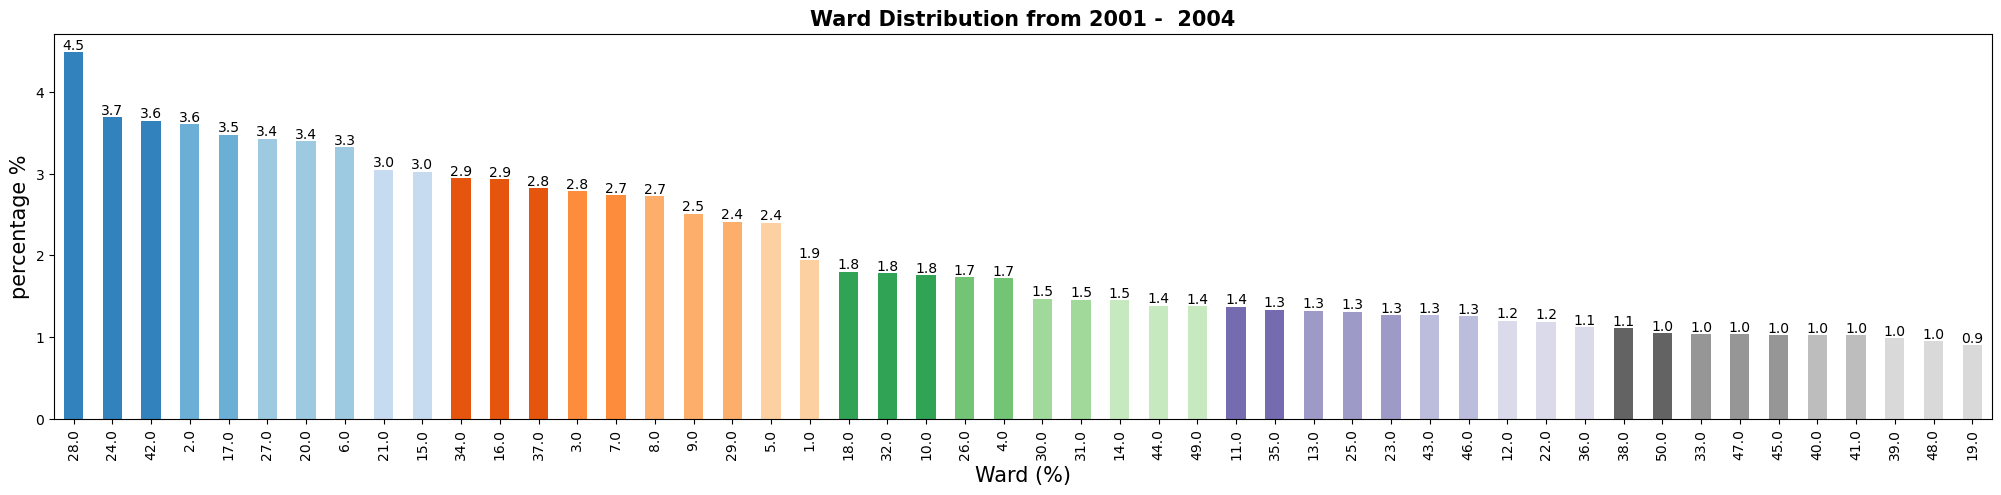

In [28]:
# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.Ward.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


count = df1.Ward.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors, figsize = (25, 5))
# plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge')
plt.title("Ward Distribution from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("Ward (%)", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);



#### Note: District: Indicates the police district where the incident occurred.

#### Analysing the distribution of the police districts where the incident occur

In [29]:
df1.District.value_counts()

District
8.0     111272
7.0      94725
25.0     94058
11.0     93260
6.0      91404
4.0      90596
3.0      80227
9.0      77286
12.0     72594
5.0      69448
15.0     69242
19.0     67190
2.0      65773
10.0     64659
18.0     63517
14.0     60861
1.0      53616
22.0     52258
16.0     51834
24.0     46151
17.0     45921
20.0     25177
31.0        64
23.0         1
Name: count, dtype: int64

From the distribution, most of the incident occurs in district 8 and there seems to be no incident that occur at district 31 and 21


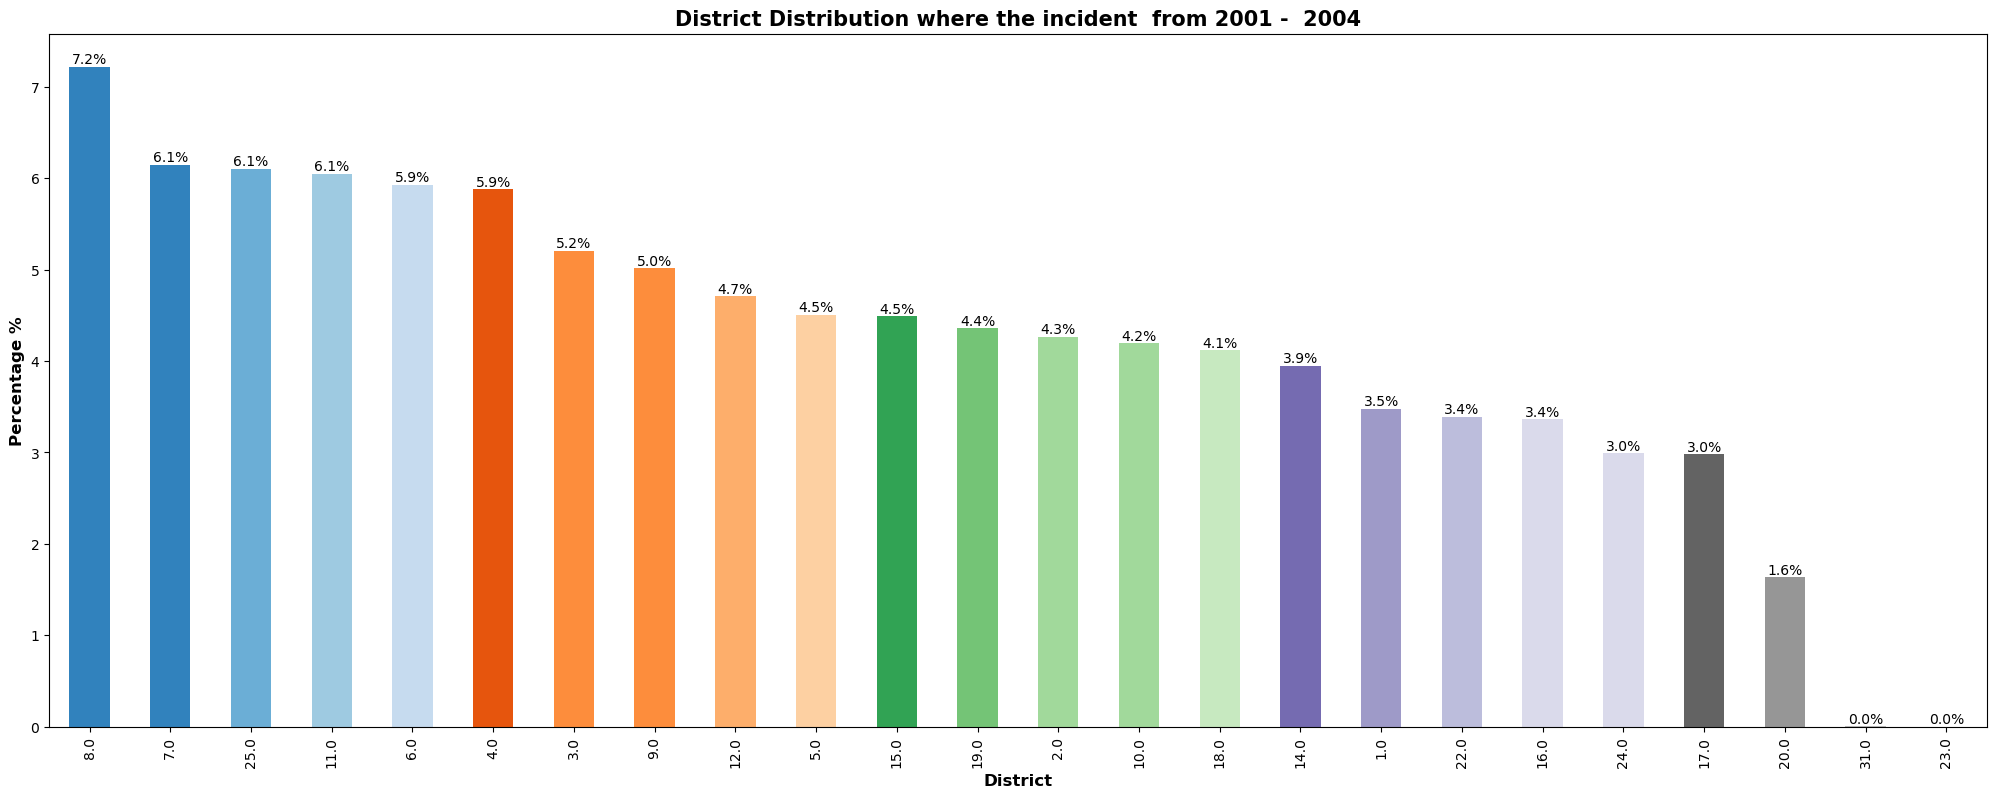

In [30]:
# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.District.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


count = df1.District.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors, figsize = (25, 9))

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("District Distribution where the incident  from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("District", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")
print ("From the distribution, most of the incident occurs in district 8 and there seems to be no incident that occur at district 31 and 21")

## Analysising which ward is visited the most by a particular district

 The plot shows the district police that intervane in diffrent incident in the ward


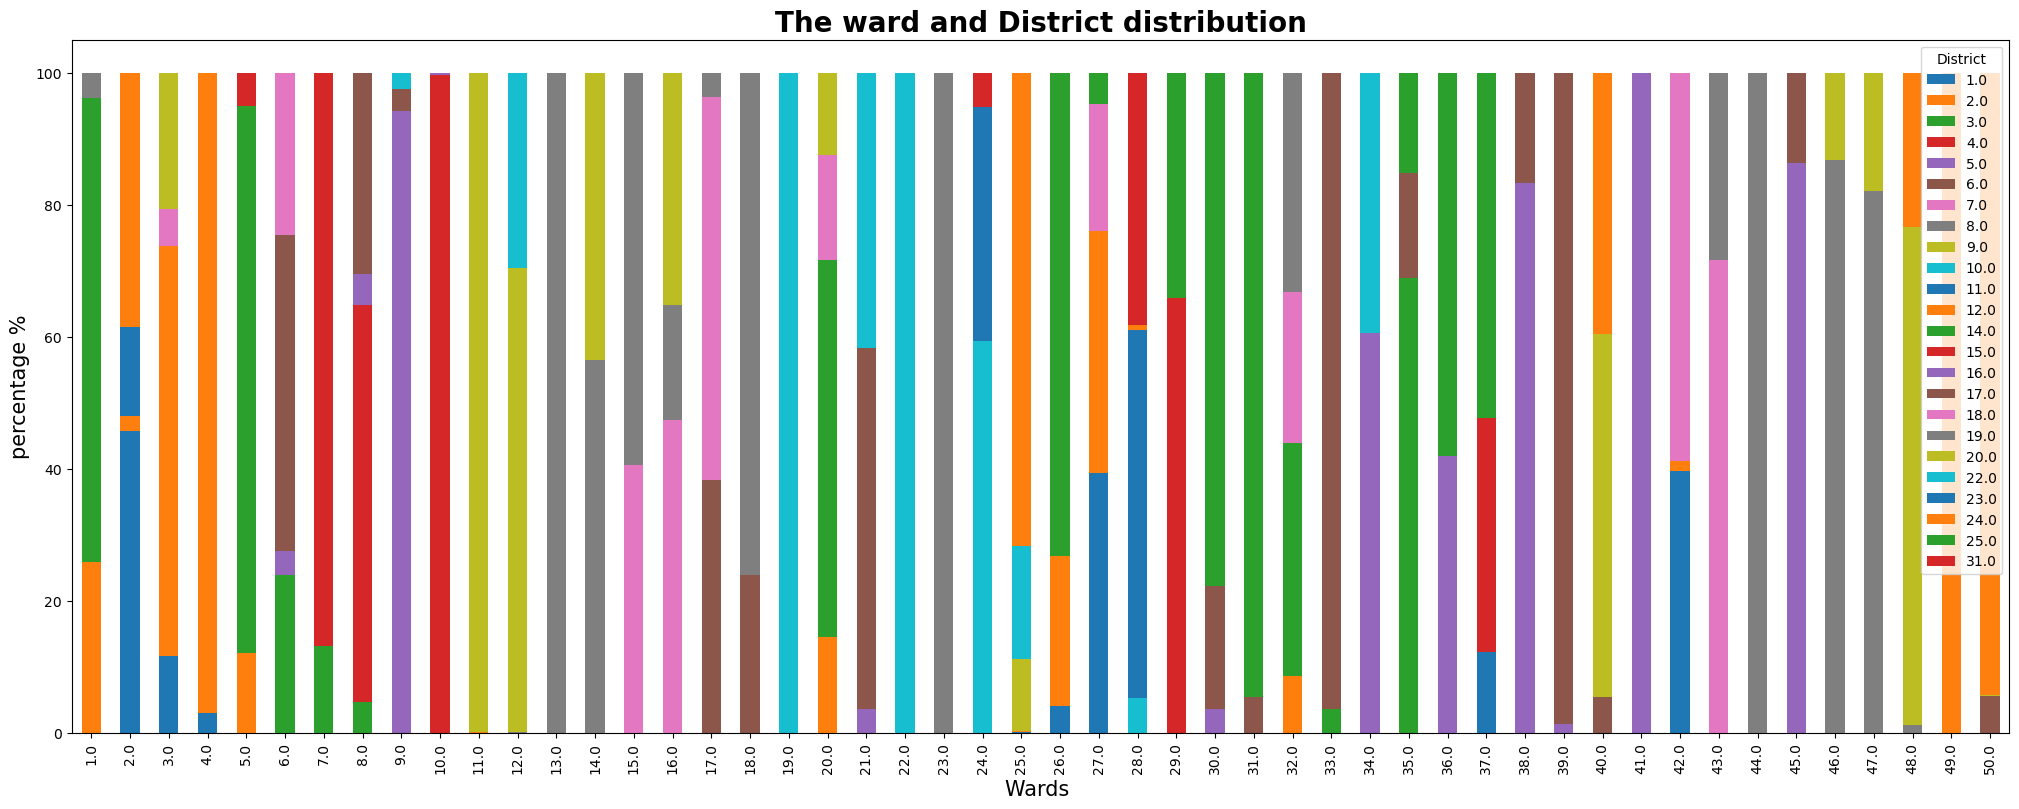

In [31]:
crosstab = pd.crosstab(df["Ward"], df["District"], normalize = "index") * 100 
bars = crosstab.plot(kind = "bar", stacked = True, figsize = (25, 9), )
plt.xlabel("Wards ", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15)
plt.title("The ward and District distribution", fontsize = 20, fontweight = "bold")
print(" The plot shows the district police that intervane in diffrent incident in the ward")
# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center')

##### From the graph above we can observe that there are some wards where only a particular district police intervenes in their situation but there are different police district intervene

In [32]:
df1.columns

Index(['Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year'],
      dtype='object')

### analyzing the unique offense type  distribution `primary type`

In [33]:
df1["Primary Type"].unique()

array(['HOMICIDE', 'SEX OFFENSE', 'BATTERY', 'DECEPTIVE PRACTICE',
       'CRIM SEXUAL ASSAULT', 'THEFT', 'MOTOR VEHICLE THEFT',
       'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'PROSTITUTION',
       'BURGLARY', 'OFFENSE INVOLVING CHILDREN', 'ROBBERY', 'ASSAULT',
       'CRIMINAL TRESPASS', 'PUBLIC PEACE VIOLATION', 'WEAPONS VIOLATION',
       'KIDNAPPING', 'GAMBLING', 'LIQUOR LAW VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON', 'STALKING',
       'INTIMIDATION', 'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION'], dtype=object)

In [34]:
print ("The Value Counts of the primary description of the  Crime")
df1["Primary Type"].value_counts()

The Value Counts of the primary description of the  Crime


Primary Type
THEFT                               321274
BATTERY                             270241
CRIMINAL DAMAGE                     178540
NARCOTICS                           172049
BURGLARY                            106026
OTHER OFFENSE                        94334
ASSAULT                              90250
MOTOR VEHICLE THEFT                  72777
ROBBERY                              60937
DECEPTIVE PRACTICE                   53528
CRIMINAL TRESPASS                    41220
WEAPONS VIOLATION                    15619
PROSTITUTION                         13990
PUBLIC PEACE VIOLATION               12793
OFFENSE INVOLVING CHILDREN            9981
CRIM SEXUAL ASSAULT                   5726
SEX OFFENSE                           4903
GAMBLING                              3853
LIQUOR LAW VIOLATION                  3013
INTERFERENCE WITH PUBLIC OFFICER      2997
ARSON                                 2286
HOMICIDE                              1848
KIDNAPPING                            123

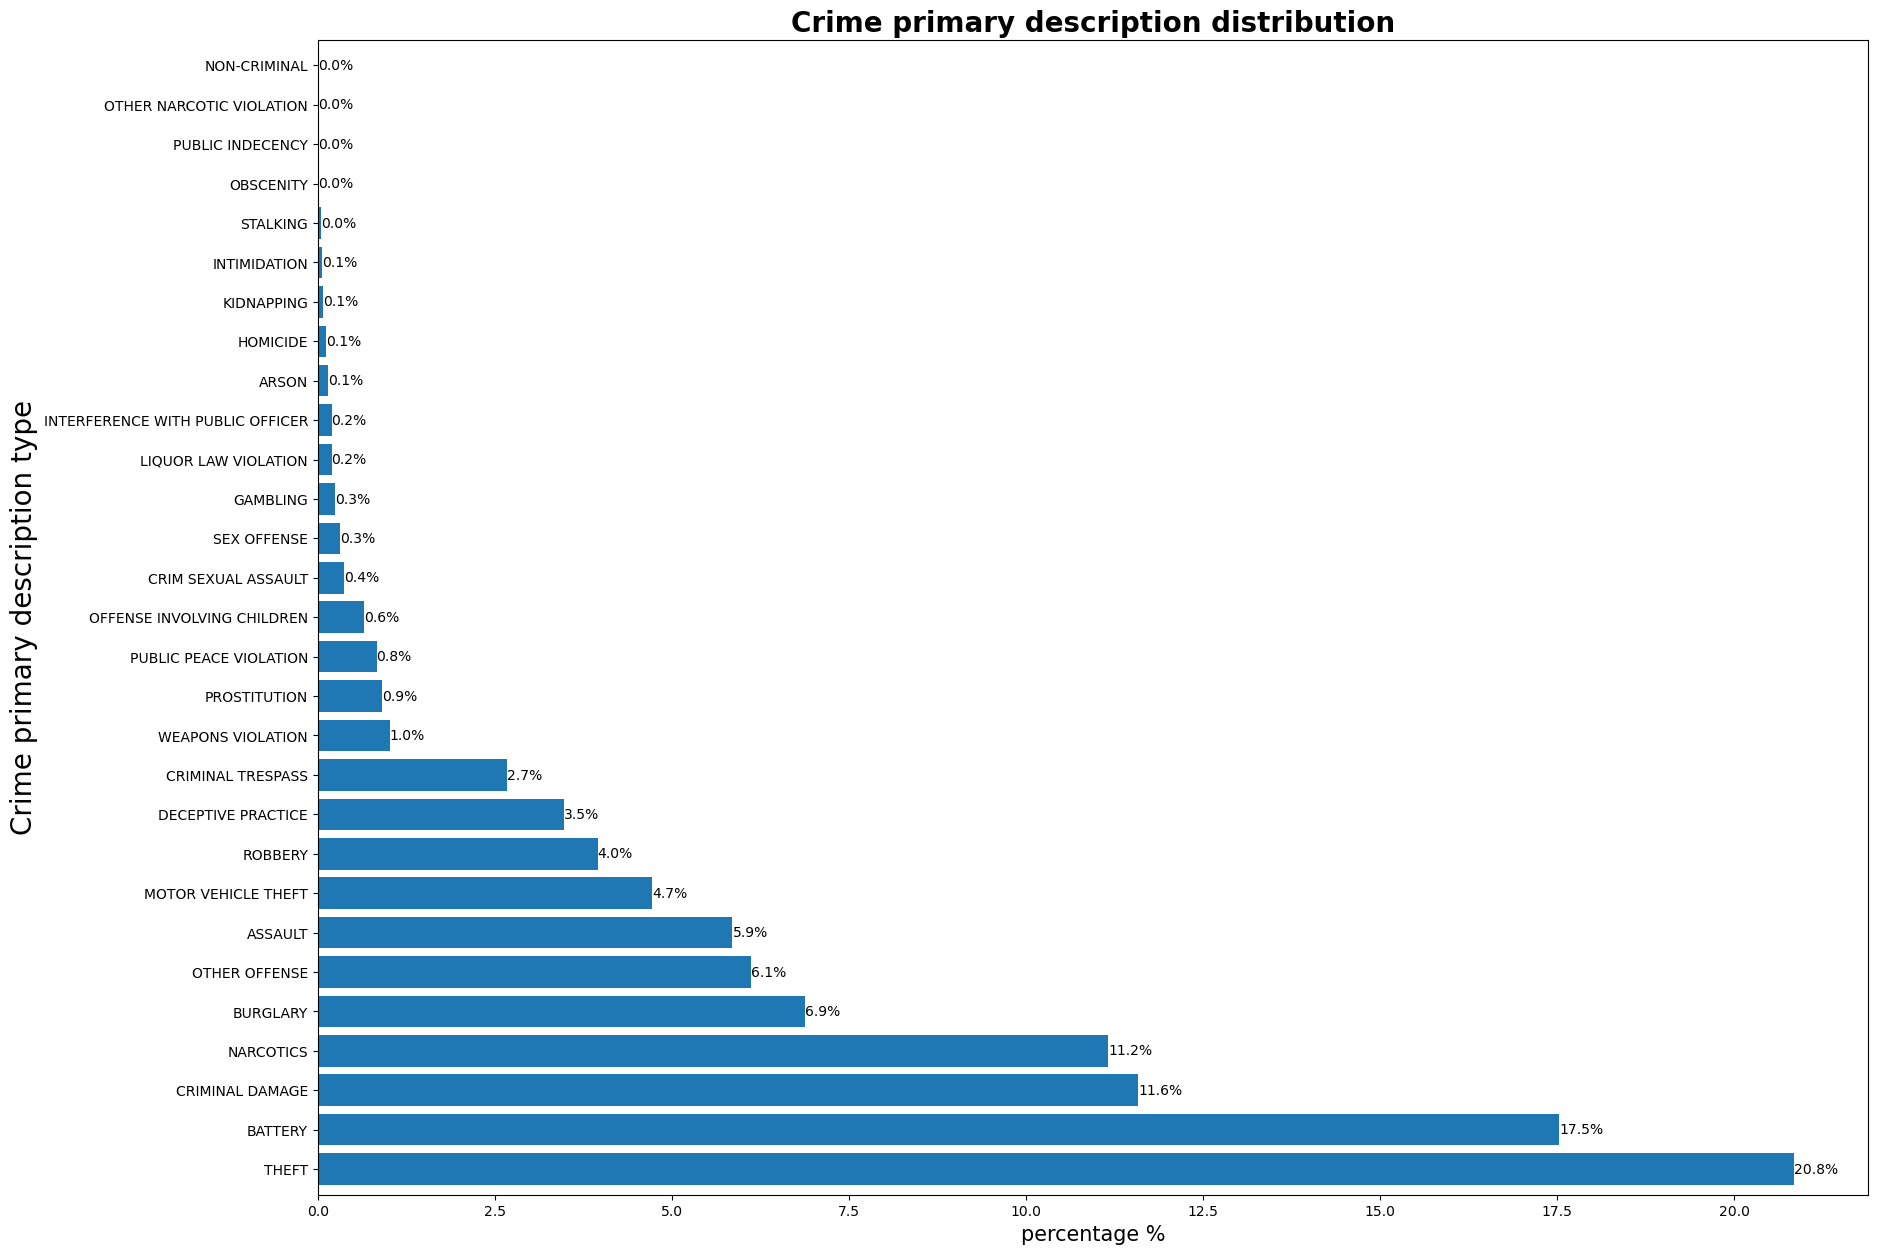

In [35]:
# plotting the primary description of the crime type
count = df1["Primary Type"].value_counts(normalize = True) * 100
bars = count.plot(kind = "barh", figsize = (20, 15), width = 0.8)
plt.xlabel("percentage %", fontsize= 15)
plt.ylabel("Crime primary description type", fontsize= 20)
plt.title("Crime primary description distribution", fontsize= 20, fontweight = "bold")
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

##### From the graph above, theft is the most.
* next: Analyzing the ward distribution and the type of  crime commited

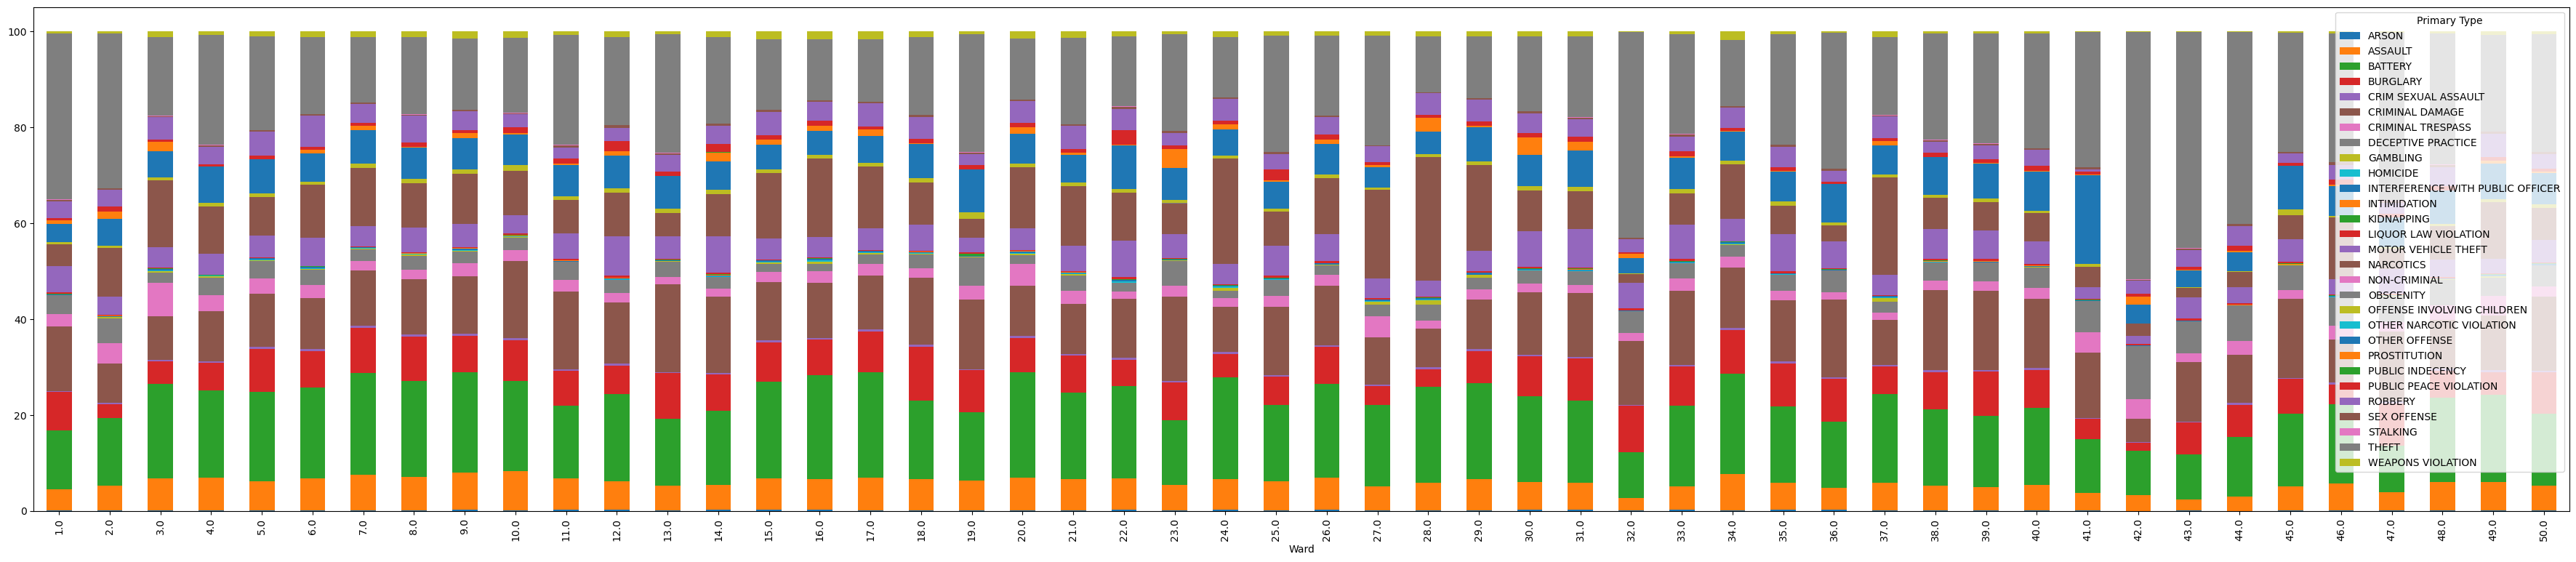

In [36]:
cross = pd.crosstab(df1["Ward"], df1["Primary Type"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (45,9), stacked = True)
# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center')

##### From the graph above, Ward 42 is rated highest in Theft

### Analyzing the location description where the incident occur

In [37]:
des_count = df1["Location Description"].value_counts()
des_count 

Location Description
STREET           388811
RESIDENCE        257615
APARTMENT        176144
SIDEWALK         175654
OTHER             52641
                  ...  
CTA PROPERTY          1
ROOMING HOUSE         1
CHA STAIRWELL         1
RIVER BANK            1
FACTORY               1
Name: count, Length: 134, dtype: int64

In [38]:
# Normalizing the Location Description 
des_count1 = df1["Location Description"].value_counts(normalize = True) * 100
des_count1.head(50)

Location Description
STREET                               25.232688
RESIDENCE                            16.718455
APARTMENT                            11.431227
SIDEWALK                             11.399427
OTHER                                 3.416246
PARKING LOT/GARAGE(NON.RESID.)        2.859689
ALLEY                                 2.257509
SCHOOL, PUBLIC, BUILDING              2.140954
RESIDENCE-GARAGE                      2.042310
RESIDENCE PORCH/HALLWAY               1.690244
SMALL RETAIL STORE                    1.669152
VEHICLE NON-COMMERCIAL                1.568497
RESTAURANT                            1.403658
RESIDENTIAL YARD (FRONT/BACK)         1.394638
DEPARTMENT STORE                      1.218312
GROCERY FOOD STORE                    1.122979
GAS STATION                           0.977415
PARK PROPERTY                         0.755856
COMMERCIAL / BUSINESS OFFICE          0.619442
BAR OR TAVERN                         0.582646
CTA PLATFORM                          0

##### From the value count above, removing the outliers (the location description percentage that is greater than 1)
##### Note: the filtration can be adjusted

In [39]:
des_count_filtered = des_count1[des_count1 > 1]

# Show the filtered value counts
print(des_count_filtered)

Location Description
STREET                            25.232688
RESIDENCE                         16.718455
APARTMENT                         11.431227
SIDEWALK                          11.399427
OTHER                              3.416246
PARKING LOT/GARAGE(NON.RESID.)     2.859689
ALLEY                              2.257509
SCHOOL, PUBLIC, BUILDING           2.140954
RESIDENCE-GARAGE                   2.042310
RESIDENCE PORCH/HALLWAY            1.690244
SMALL RETAIL STORE                 1.669152
VEHICLE NON-COMMERCIAL             1.568497
RESTAURANT                         1.403658
RESIDENTIAL YARD (FRONT/BACK)      1.394638
DEPARTMENT STORE                   1.218312
GROCERY FOOD STORE                 1.122979
Name: proportion, dtype: float64


In [40]:
des_count_filtered.index

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING',
       'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'SMALL RETAIL STORE',
       'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'RESIDENTIAL YARD (FRONT/BACK)',
       'DEPARTMENT STORE', 'GROCERY FOOD STORE'],
      dtype='object', name='Location Description')

Text(0.5, 1.0, 'Crime Location Description')

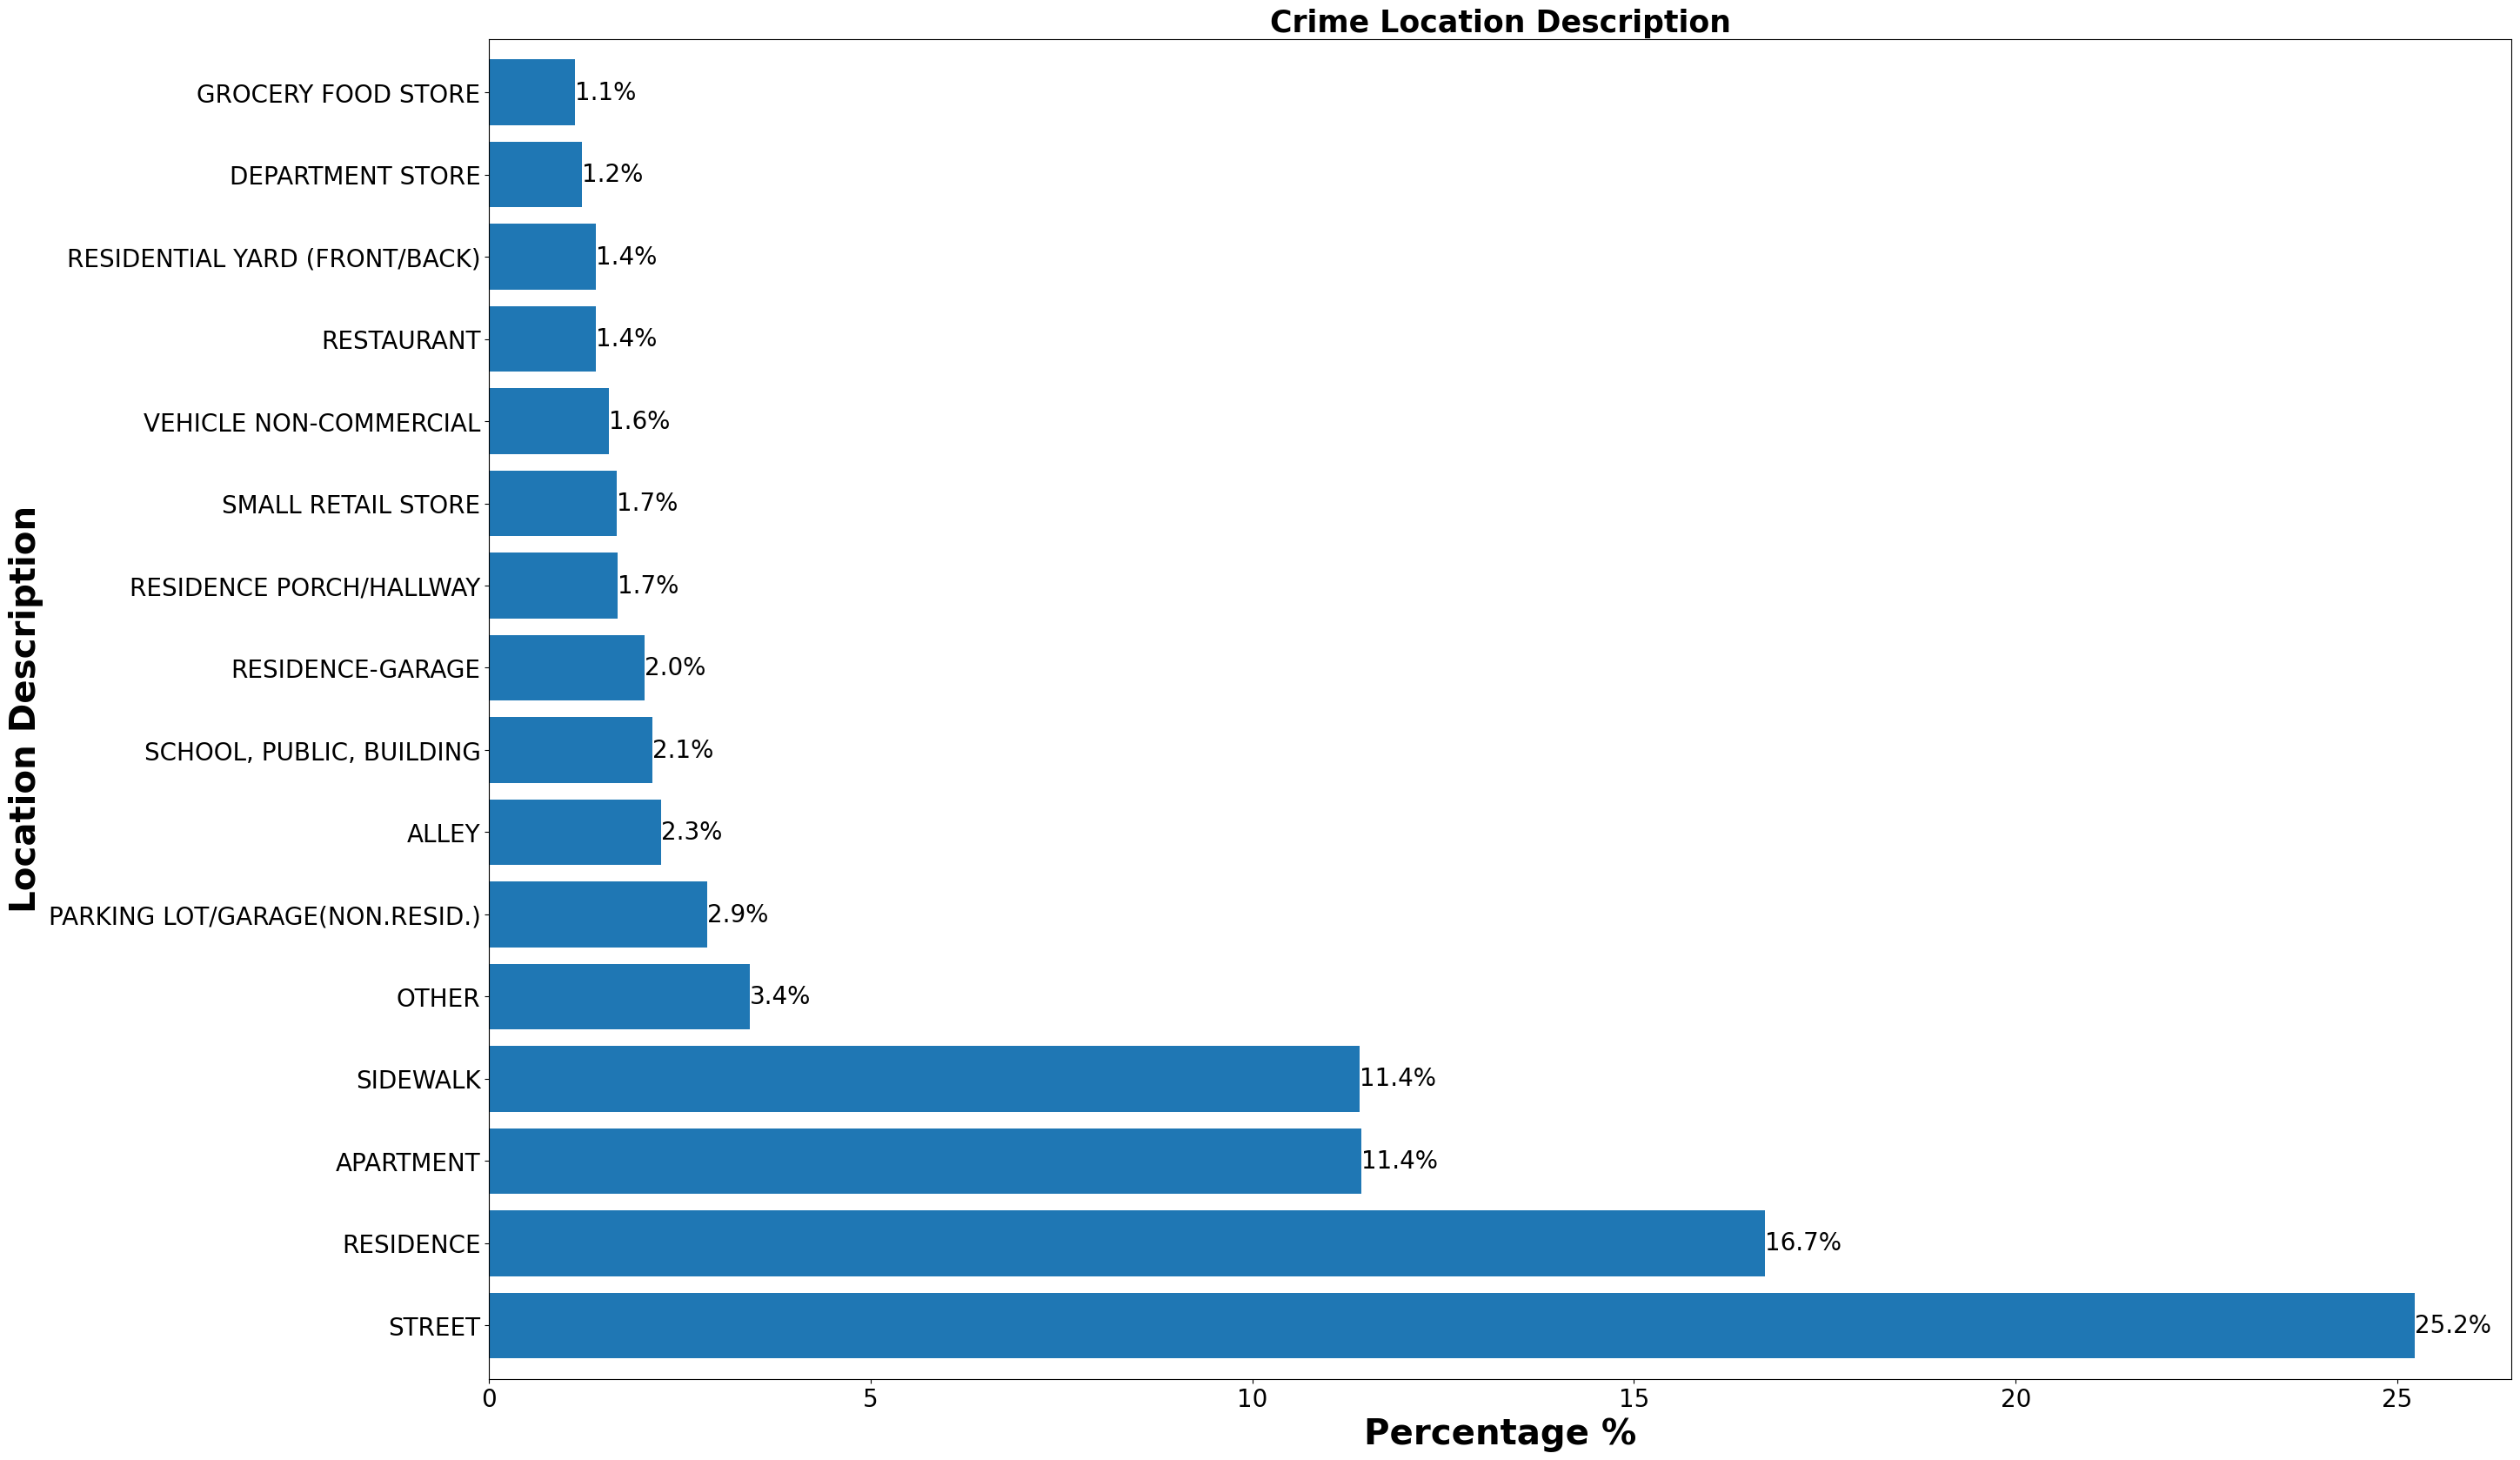

In [41]:
bars = des_count_filtered.plot(kind = "barh", figsize = (30, 20), width = 0.8)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  # Increase y-axis tick label size
plt.xlabel("Percentage %",fontsize=29, fontweight = "bold")  
plt.ylabel("Location Description",fontsize=29, fontweight = "bold")  
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

plt.title("Crime Location Description", fontsize= 25, fontweight = "bold")

#### using the filtered location description to compare with:
1. the crime type `Primary Type` column
2. the ward where crime occurs most `Ward`
3. analyze to know at what rate the crime increases or decreases annually
4. what crime causes Arrest

In [42]:
des_index = des_count_filtered.index
des_index

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING',
       'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'SMALL RETAIL STORE',
       'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'RESIDENTIAL YARD (FRONT/BACK)',
       'DEPARTMENT STORE', 'GROCERY FOOD STORE'],
      dtype='object', name='Location Description')

In [43]:
selected_col = df1[[ 'Ward', 'Location Description']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Ward,Location Description
0,6.0,ALLEY
1,24.0,STREET
3,37.0,RESTAURANT
5,2.0,STREET
6,25.0,STREET
...,...,...
2688701,34.0,STREET
2688702,28.0,STREET
2688703,27.0,STREET
2688704,28.0,STREET


In [44]:
cross = pd.crosstab(filtered_df["Ward"], filtered_df["Location Description"], normalize = "index") * 100
cross

Location Description,ALLEY,APARTMENT,DEPARTMENT STORE,GROCERY FOOD STORE,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,"SCHOOL, PUBLIC, BUILDING",SIDEWALK,SMALL RETAIL STORE,STREET,VEHICLE NON-COMMERCIAL
Ward,,,,,,,,,,,,,,,,
1.0,2.455331,9.721422,2.205572,2.543708,4.899135,3.903939,12.011527,1.540826,3.296830,1.602305,2.278578,2.927954,10.332373,2.624400,35.093180,2.562920
2.0,1.885312,7.707670,1.416956,3.123960,7.650611,6.930246,11.761210,1.271932,1.167324,0.931958,3.642242,4.170035,13.615615,1.583377,31.826827,1.314726
3.0,2.475510,13.708250,0.655022,0.843857,3.776702,2.980054,16.384397,2.384043,0.711082,1.138912,1.386758,3.879972,13.717101,1.634604,32.689130,1.634604
4.0,1.621504,19.241275,0.173423,1.751572,4.699762,4.183828,17.415998,2.462606,0.815088,1.053544,1.148927,4.097117,9.624973,1.872968,28.129200,1.708216
5.0,1.859349,26.126856,0.338881,3.010946,3.787674,2.768031,14.322987,2.648073,0.767731,0.890688,0.845704,2.294197,12.469636,1.742390,24.930274,1.196581
6.0,2.247440,16.566019,1.386953,0.544164,3.149955,2.265136,19.406287,1.959873,1.904572,1.446679,1.252018,2.999535,13.077621,1.809454,28.535404,1.448891
7.0,1.869516,21.056927,0.288206,0.609569,2.649969,1.601714,24.153234,1.948582,1.379820,1.713936,0.471842,2.173026,13.209039,1.601714,24.035911,1.236992
8.0,2.379339,16.848223,0.664547,0.500365,3.119462,2.527885,24.087877,1.488064,1.915459,1.602731,0.807881,5.204316,11.612634,1.308246,24.640363,1.292609
9.0,2.318677,8.541401,0.157349,0.540332,3.060891,2.357272,30.638601,1.573494,2.012885,1.950539,0.617522,2.651189,11.162901,1.576463,29.106671,1.733812


From the graph it observed that in most wards, the crime locations are;
Grocery food stores and Residnce


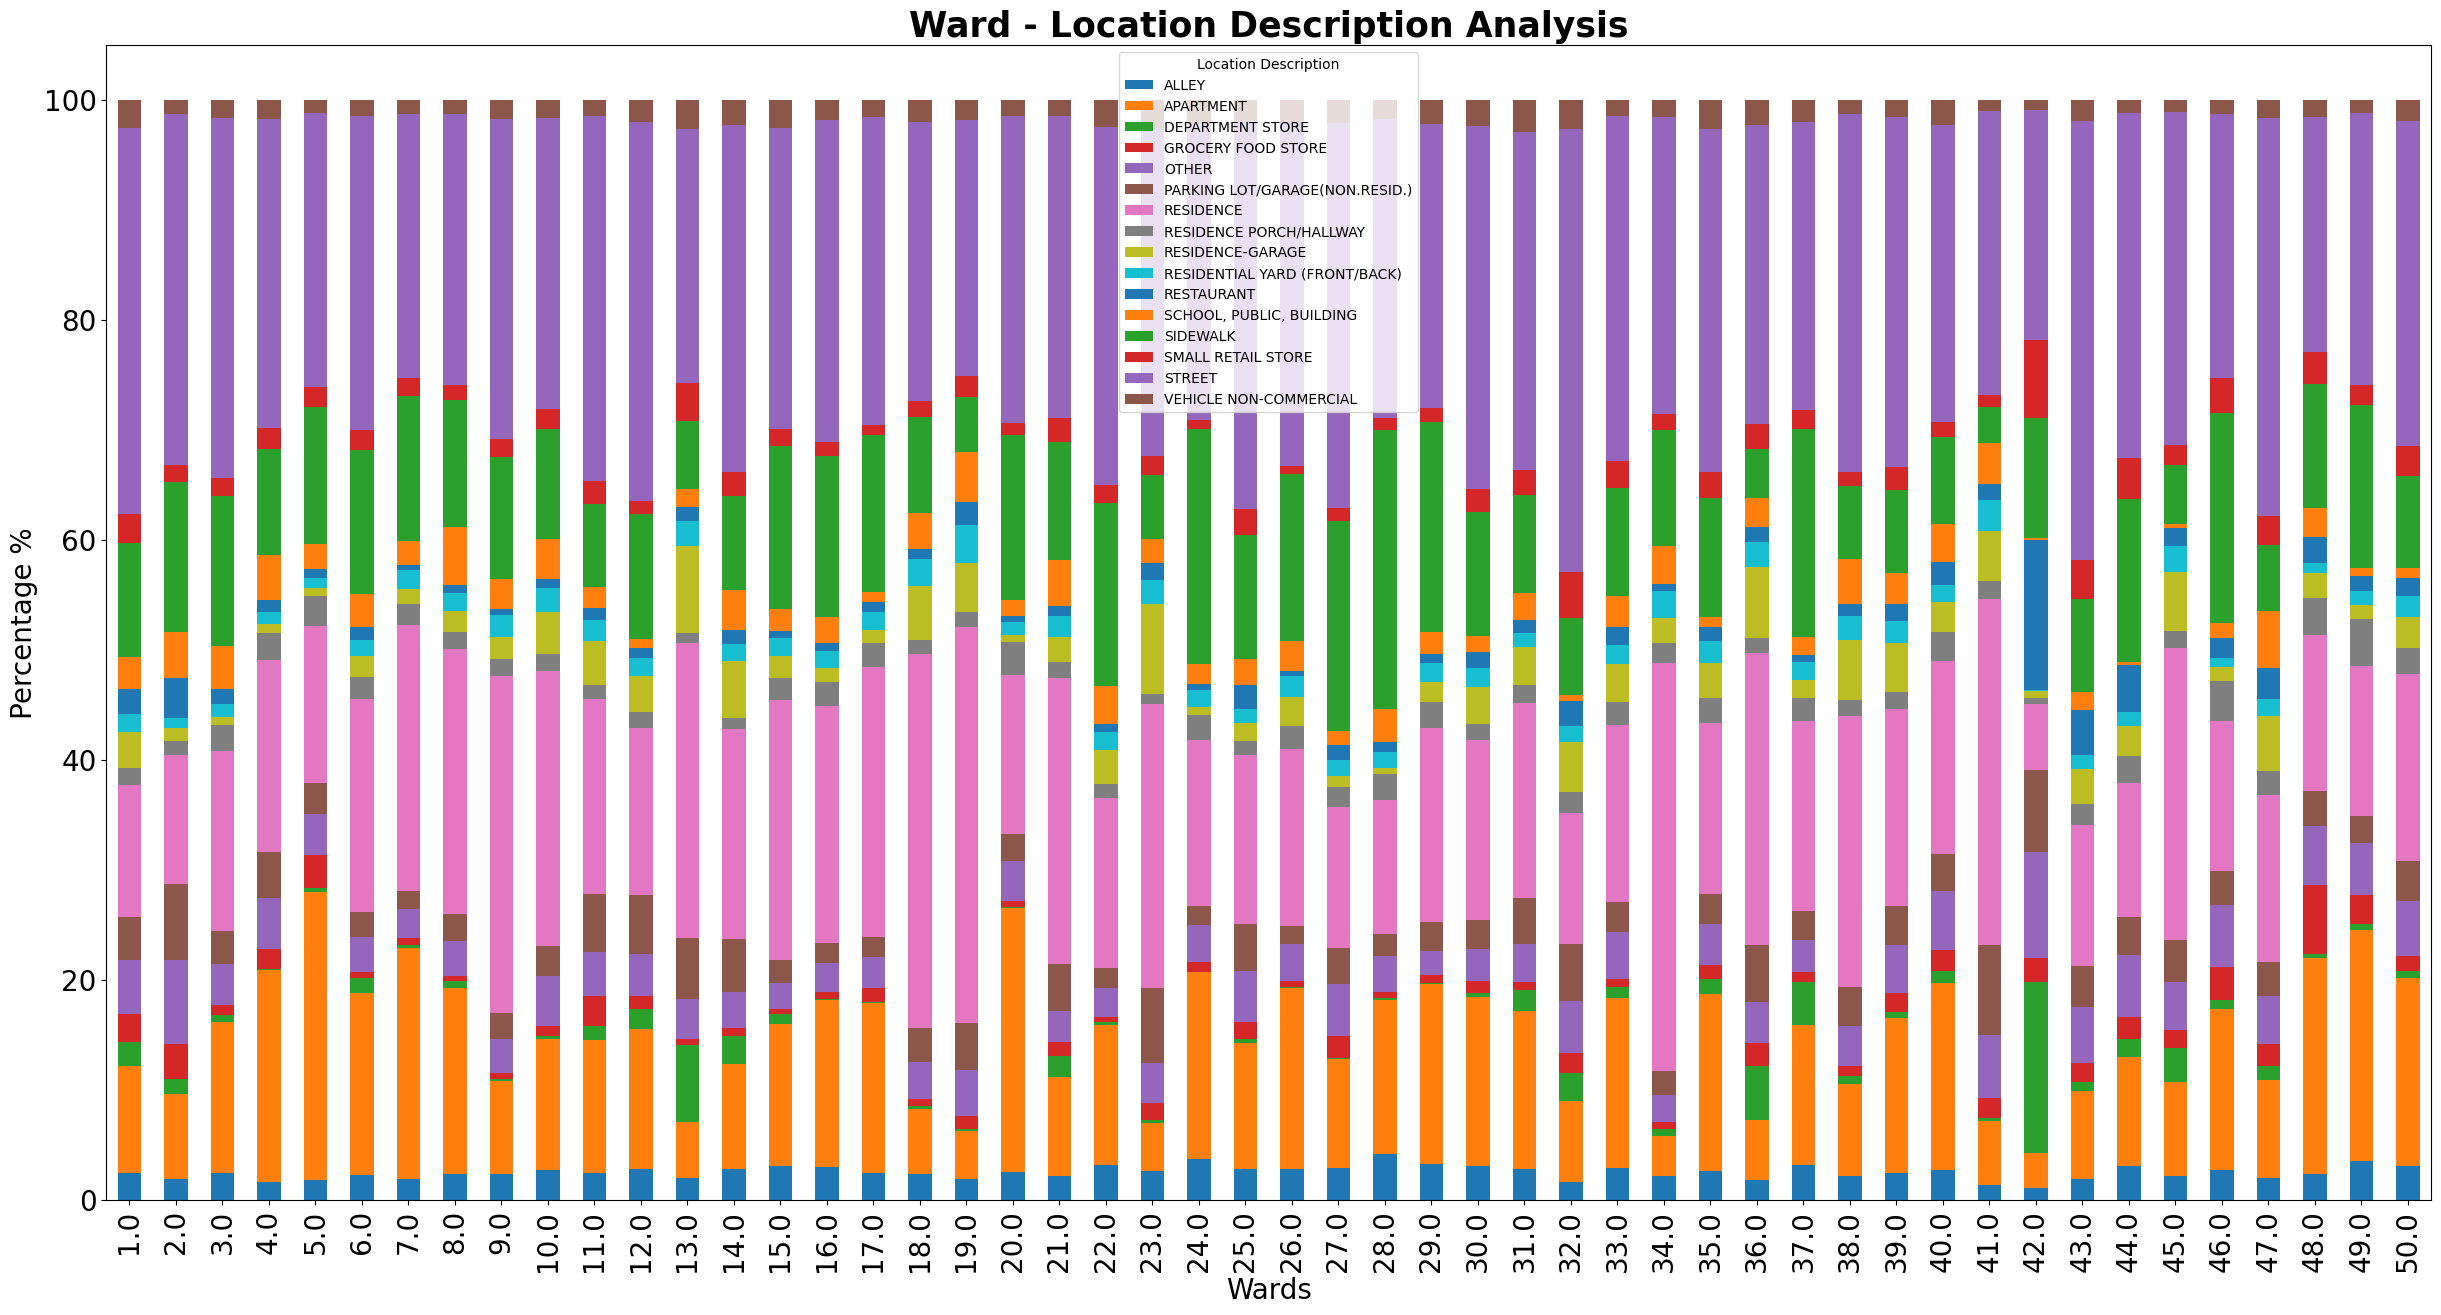

In [45]:
cross.plot(kind = "bar", figsize = (30, 15), stacked = True)
plt.ylabel("Percentage %", fontsize = 20)
plt.xlabel("Wards", fontsize = 20)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  # Increase y-axis tick label size

plt.title("Ward - Location Description Analysis", fontsize = 25, fontweight = "bold")
print ("From the graph it observed that in most wards, the crime locations are;")
print("Grocery food stores and Residnce" )

##### Analysing the location description and the primary crime type. ie the location where a particular type of crime occur

In [46]:
selected_col = df1[[ 'Primary Type', 'Location Description']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Primary Type,Location Description
0,HOMICIDE,ALLEY
1,HOMICIDE,STREET
3,HOMICIDE,RESTAURANT
5,HOMICIDE,STREET
6,HOMICIDE,STREET
...,...,...
2688701,HOMICIDE,STREET
2688702,HOMICIDE,STREET
2688703,HOMICIDE,STREET
2688704,HOMICIDE,STREET


In [47]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Location Description"], normalize = "index") * 100
cross

Location Description,ALLEY,APARTMENT,DEPARTMENT STORE,GROCERY FOOD STORE,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,"SCHOOL, PUBLIC, BUILDING",SIDEWALK,SMALL RETAIL STORE,STREET,VEHICLE NON-COMMERCIAL
Primary Type,,,,,,,,,,,,,,,,
ARSON,3.507929,10.187410,0.096108,0.816915,2.498799,0.624700,20.278712,5.910620,7.304181,1.441615,1.105238,1.105238,0.528592,0.672753,6.006728,37.914464
ASSAULT,2.613157,15.036632,0.353774,0.918306,3.793657,2.018517,17.696206,4.758380,0.195705,1.734996,1.950773,7.081744,18.359845,1.472802,21.524990,0.490516
BATTERY,2.359170,24.654676,0.132565,0.355962,2.243380,1.517544,21.228847,2.761366,0.159569,0.964780,0.926729,4.356650,19.443717,0.484845,17.220386,1.189814
BURGLARY,0.101069,34.462630,0.137166,0.556913,3.323948,0.205233,40.352506,0.374370,16.061797,0.087662,1.617112,0.478533,0.045378,1.940947,0.211421,0.043315
CRIM SEXUAL ASSAULT,7.398615,31.849654,0.000000,0.039565,4.174085,0.850643,36.834817,1.938675,1.028684,1.246291,0.138477,0.989120,2.927794,0.158259,4.826904,5.598417
CRIMINAL DAMAGE,1.880341,12.481605,0.138506,0.323386,3.748315,4.432806,20.764132,1.485846,5.504372,2.027503,1.270668,1.181010,1.199560,1.140200,40.586548,1.835203
CRIMINAL TRESPASS,0.645236,13.136543,0.958195,4.505061,9.326945,7.128506,19.337764,11.606522,2.125029,5.660304,7.414419,3.562321,3.342091,4.080056,6.255313,0.915694
DECEPTIVE PRACTICE,0.676590,9.192986,2.619987,2.732272,13.295713,2.185242,43.068552,0.342614,0.126681,0.181384,5.096018,0.469294,4.048023,4.232286,11.314888,0.417470
GAMBLING,7.242991,0.496495,0.000000,0.233645,2.190421,0.992991,0.525701,4.585280,0.233645,2.365654,1.168224,0.496495,73.685748,0.175234,5.578271,0.029206


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

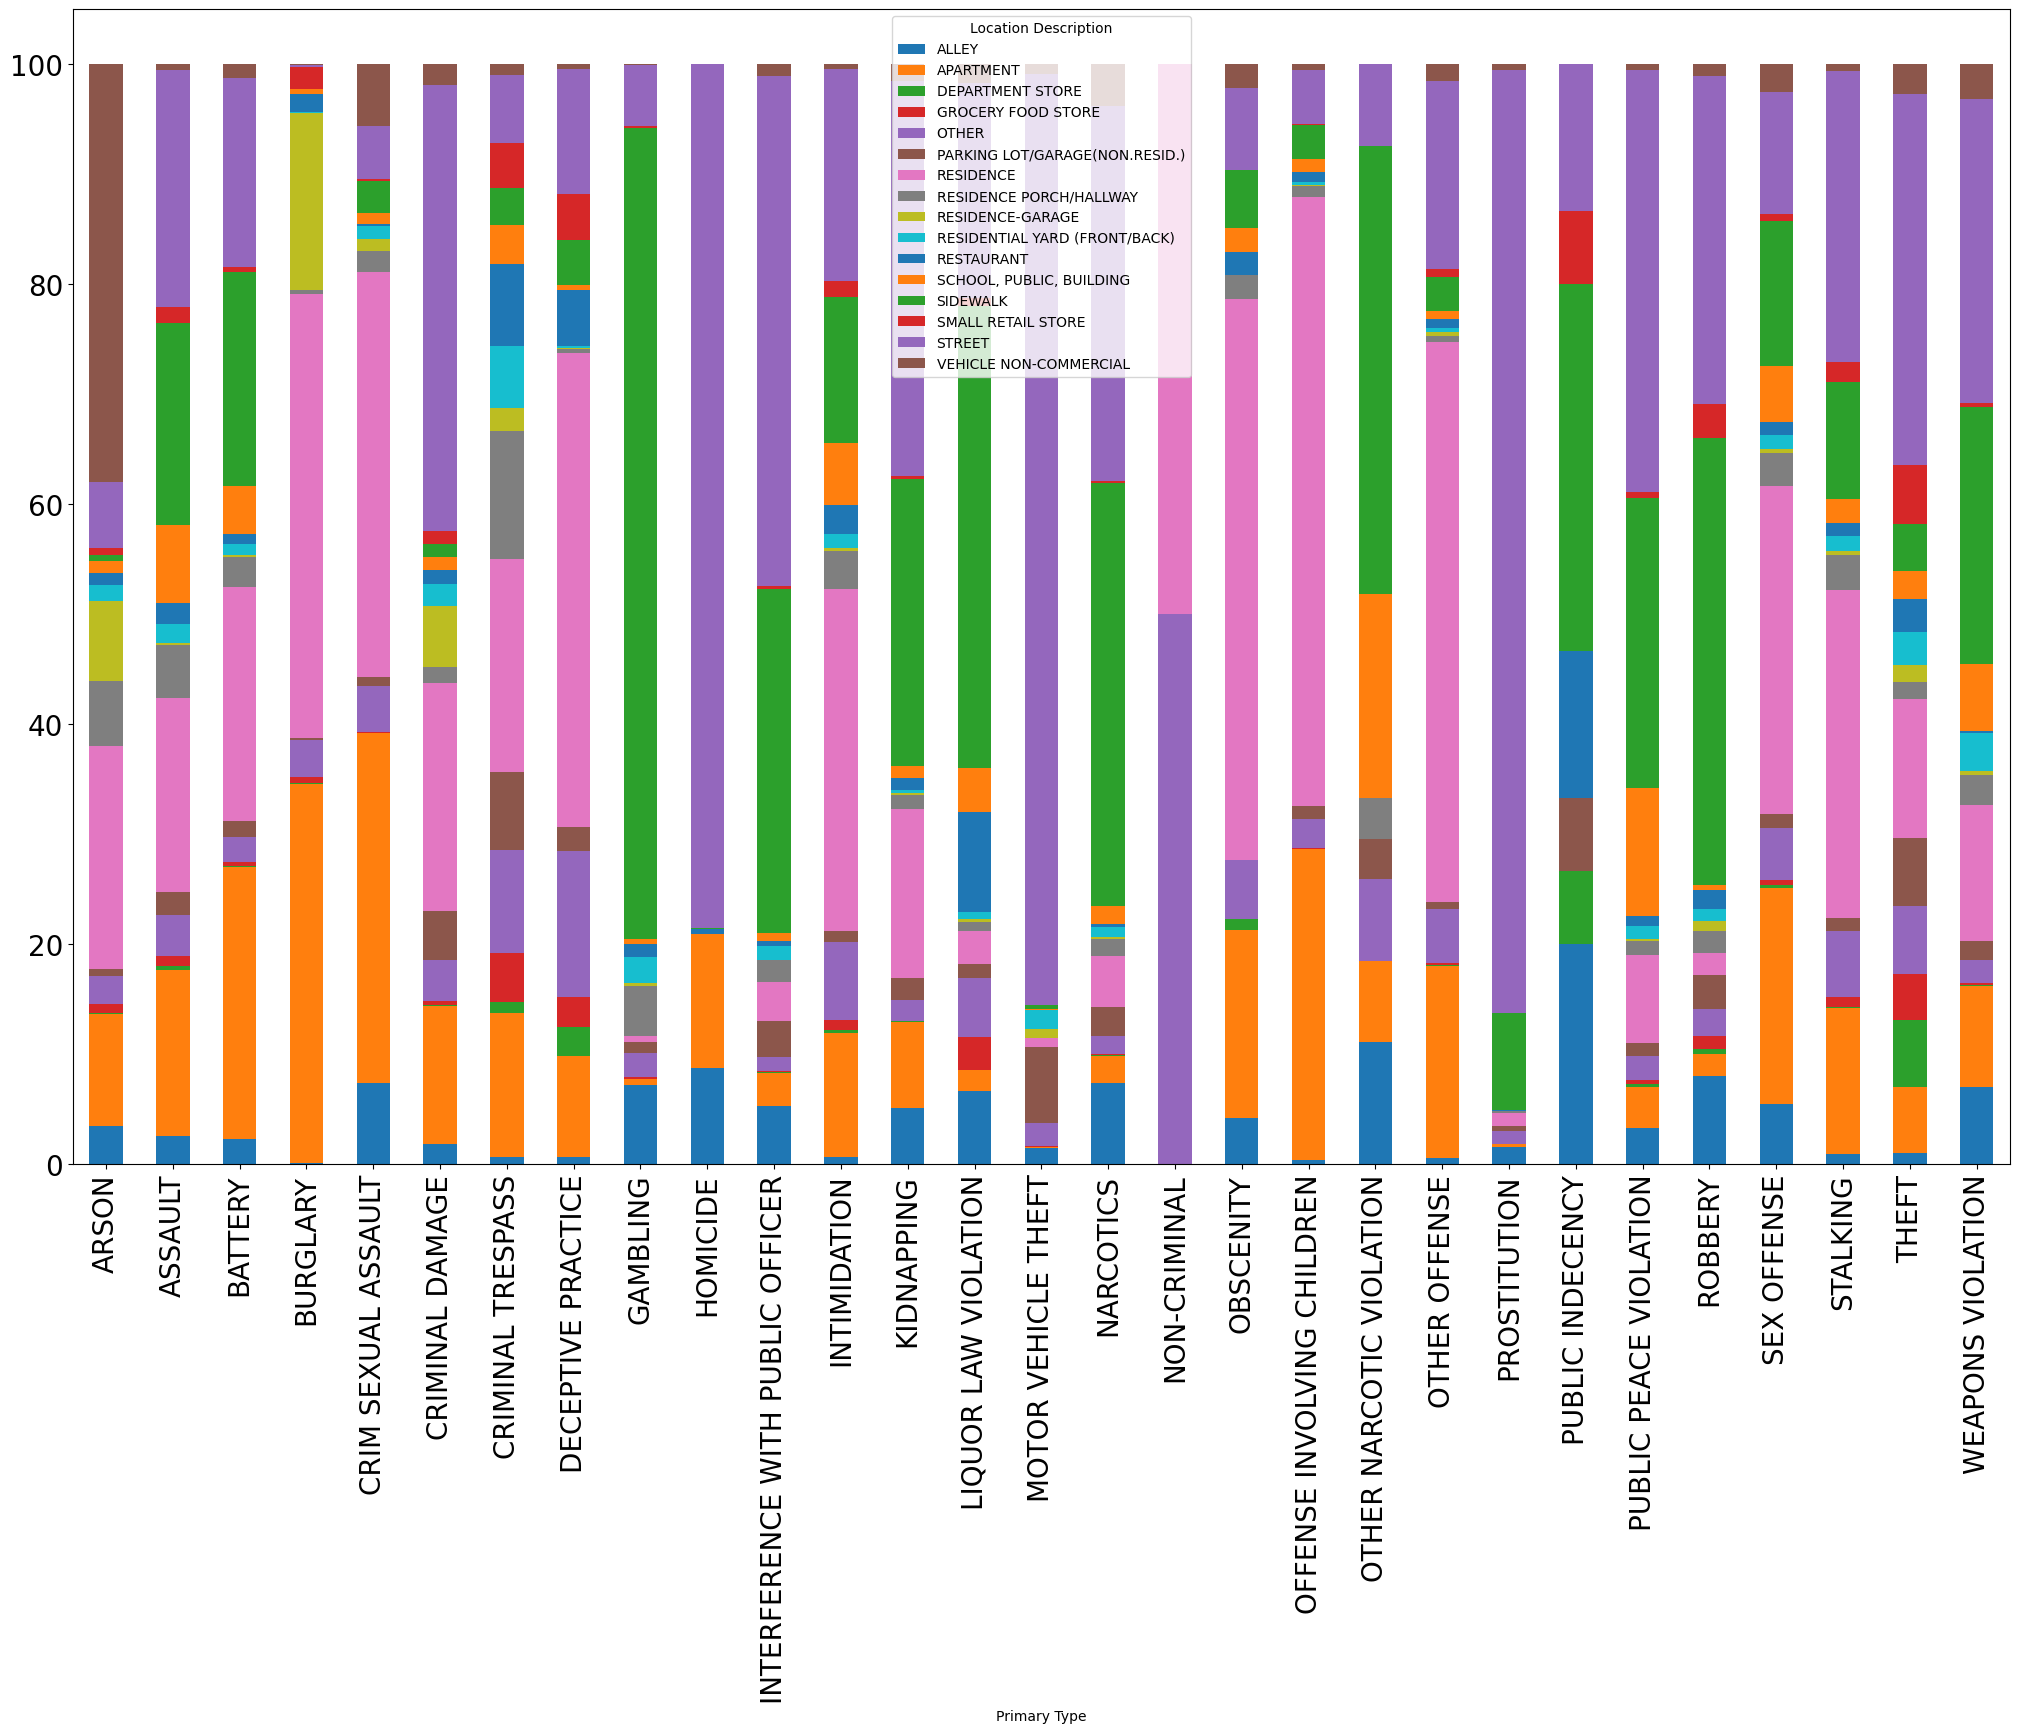

In [48]:
cross.plot(kind = "bar", figsize= (25, 15), stacked = True)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  # Increase y-axis tick label size


##### Analysing the police district that intervenes in the crime types 

In [49]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Primary Type,Location Description,District
0,HOMICIDE,ALLEY,3.0
1,HOMICIDE,STREET,15.0
3,HOMICIDE,RESTAURANT,15.0
5,HOMICIDE,STREET,12.0
6,HOMICIDE,STREET,10.0
...,...,...,...
2688701,HOMICIDE,STREET,22.0
2688702,HOMICIDE,STREET,15.0
2688703,HOMICIDE,STREET,11.0
2688704,HOMICIDE,STREET,11.0


In [50]:
cross = pd.crosstab(filtered_df["District"], filtered_df["Primary Type"], normalize = "index") * 100
cross

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
District,,,,,,,,,,,,,,,,,,,,,
1.0,0.014302,3.956063,9.330931,1.496038,0.151606,6.307389,4.047599,6.295947,0.022884,0.014302,...,0.008581,5.626591,0.168769,0.008581,0.675077,2.883378,0.157327,0.068652,50.584971,0.197374
2.0,0.070822,6.623584,19.272309,6.257082,0.364731,10.773725,2.815156,2.287535,0.309844,0.095609,...,0.000000,7.145892,1.882082,0.000000,0.407224,4.222734,0.260269,0.056657,19.017351,0.977337
3.0,0.109157,6.545321,21.396117,8.684796,0.439357,11.179031,3.351117,2.151755,0.320648,0.124166,...,0.000000,7.544106,0.291995,0.000000,0.852788,5.013031,0.201940,0.031383,13.225723,1.393115
4.0,0.156284,7.413196,19.867461,9.127474,0.422815,12.981270,1.585859,2.327300,0.129631,0.101766,...,0.002423,6.815924,0.583945,0.001212,0.846842,4.133653,0.244724,0.075113,15.121998,1.345981
5.0,0.190310,7.905942,22.048578,7.828527,0.498355,12.357267,1.790207,2.004709,0.203213,0.090317,...,0.000000,6.526998,0.685440,0.000000,0.664473,4.067480,0.253209,0.053222,13.568479,1.657958
6.0,0.136245,6.543398,19.877136,8.094398,0.423332,10.560185,1.783347,2.244389,0.239645,0.108266,...,0.000000,6.611520,0.683657,0.001216,0.725017,5.435193,0.262758,0.063256,14.802019,1.373396
7.0,0.172057,7.076559,23.668902,8.030479,0.435409,11.633133,1.478282,1.197374,0.338261,0.129920,...,0.000000,5.171062,1.439657,0.000000,0.704613,4.682983,0.244625,0.031602,13.174620,1.761532
8.0,0.206184,5.638326,16.054559,9.430914,0.345952,15.099969,1.537455,2.495019,0.156620,0.075336,...,0.001983,6.646445,1.250979,0.000000,1.134009,4.262448,0.376681,0.047581,17.745661,1.032900
9.0,0.247855,6.070269,18.671730,6.973272,0.407294,13.375464,1.636422,1.749478,0.194225,0.102910,...,0.000000,6.081865,1.269712,0.001449,1.355230,3.078618,0.462372,0.036236,16.488868,1.491477


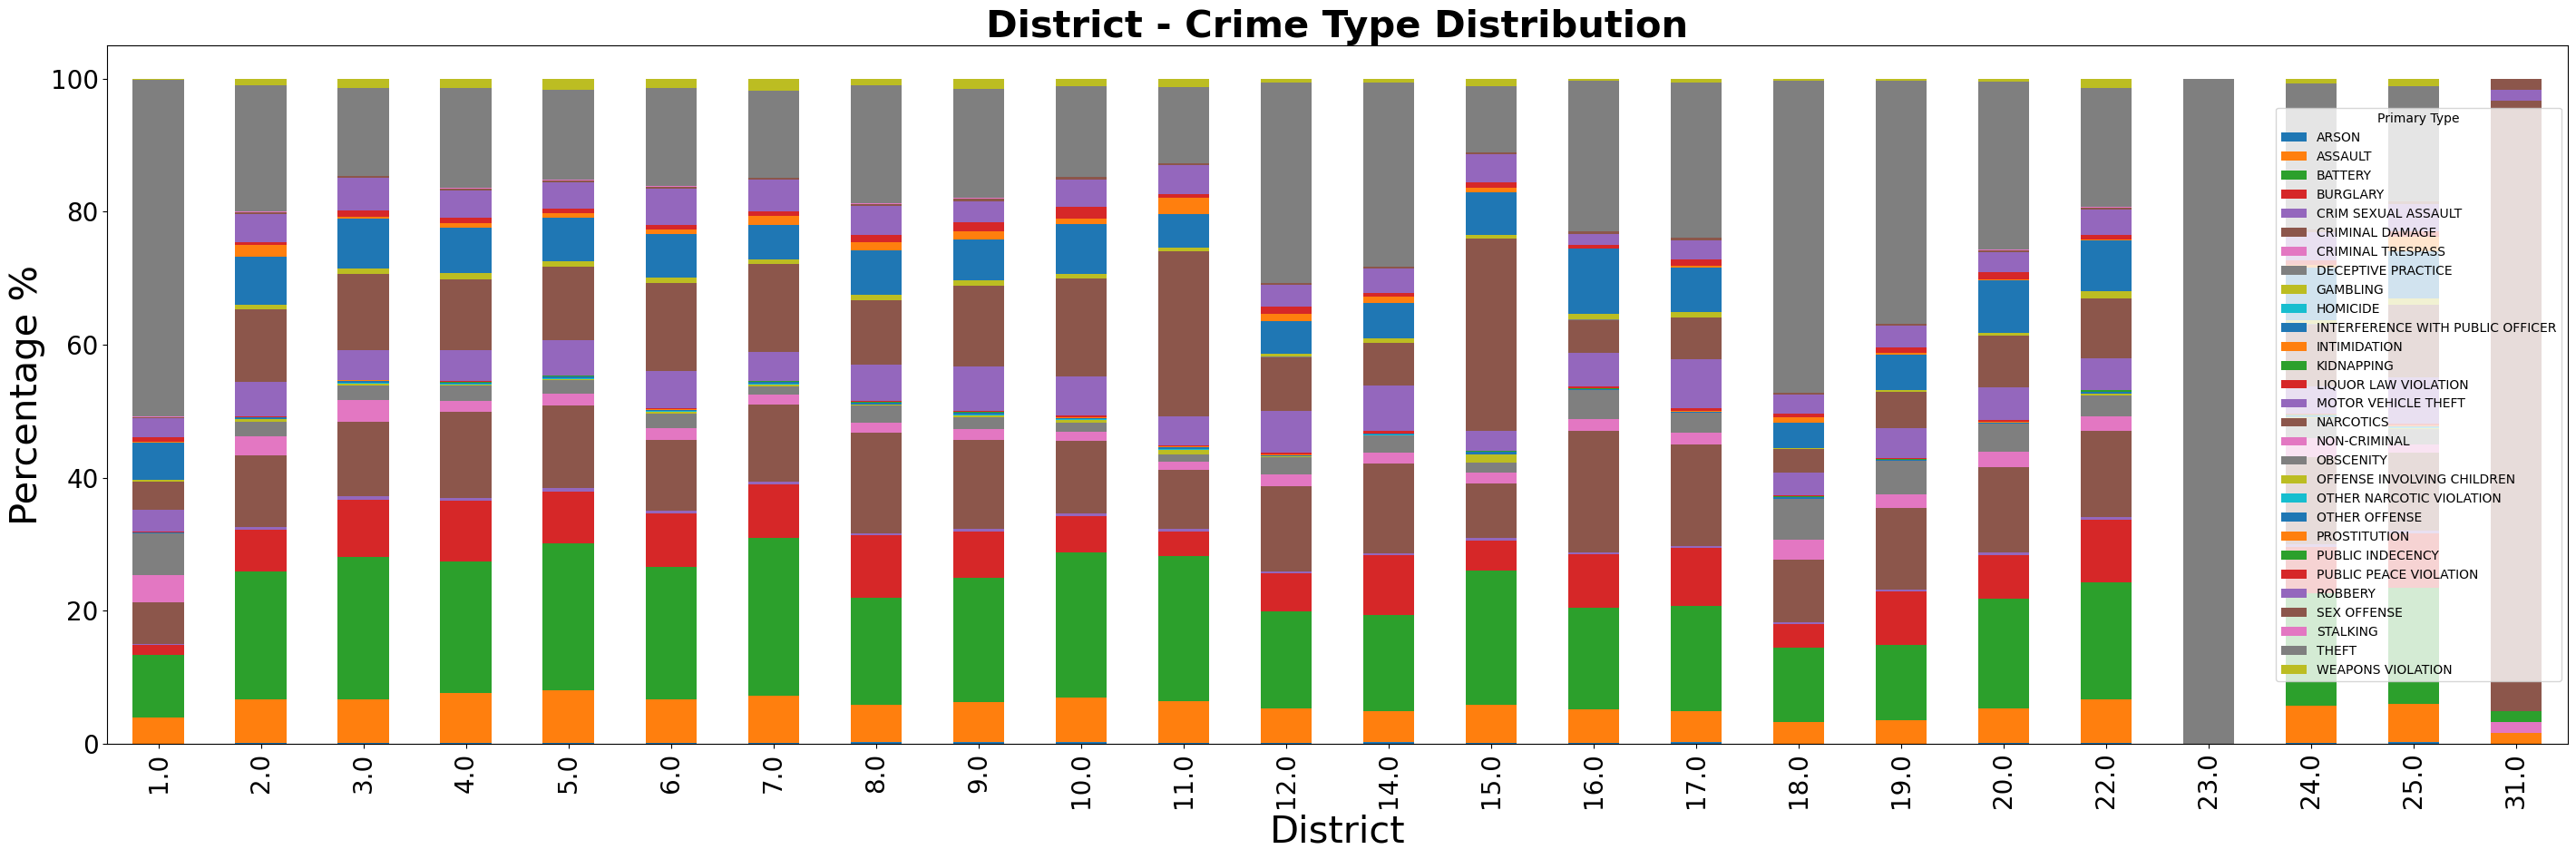

In [51]:
cross.plot(kind = "bar", figsize = (35, 10), stacked = True)
plt.title("District - Crime Type Distribution", fontsize = 30, fontweight = "bold")
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("District", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size


#### From the graph above, ward 21 intervene only on 3 crime type

#### Analysing what kind of crime do causes arrest

In [52]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District', 'Year', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Primary Type,Location Description,District,Year,Arrest
0,HOMICIDE,ALLEY,3.0,2008,True
1,HOMICIDE,STREET,15.0,2008,True
3,HOMICIDE,RESTAURANT,15.0,2008,False
5,HOMICIDE,STREET,12.0,2008,True
6,HOMICIDE,STREET,10.0,2008,True
...,...,...,...,...,...
2688701,HOMICIDE,STREET,22.0,2008,True
2688702,HOMICIDE,STREET,15.0,2008,True
2688703,HOMICIDE,STREET,11.0,2008,False
2688704,HOMICIDE,STREET,11.0,2008,False


In [53]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Arrest"]) 
cross

Arrest,False,True
Primary Type,,
ARSON,1860,221
ASSAULT,61415,18297
BATTERY,190734,53674
BURGLARY,92175,4788
CRIM SEXUAL ASSAULT,4200,855
CRIMINAL DAMAGE,151890,9836
CRIMINAL TRESPASS,9987,15895
DECEPTIVE PRACTICE,30817,3916
GAMBLING,40,3384


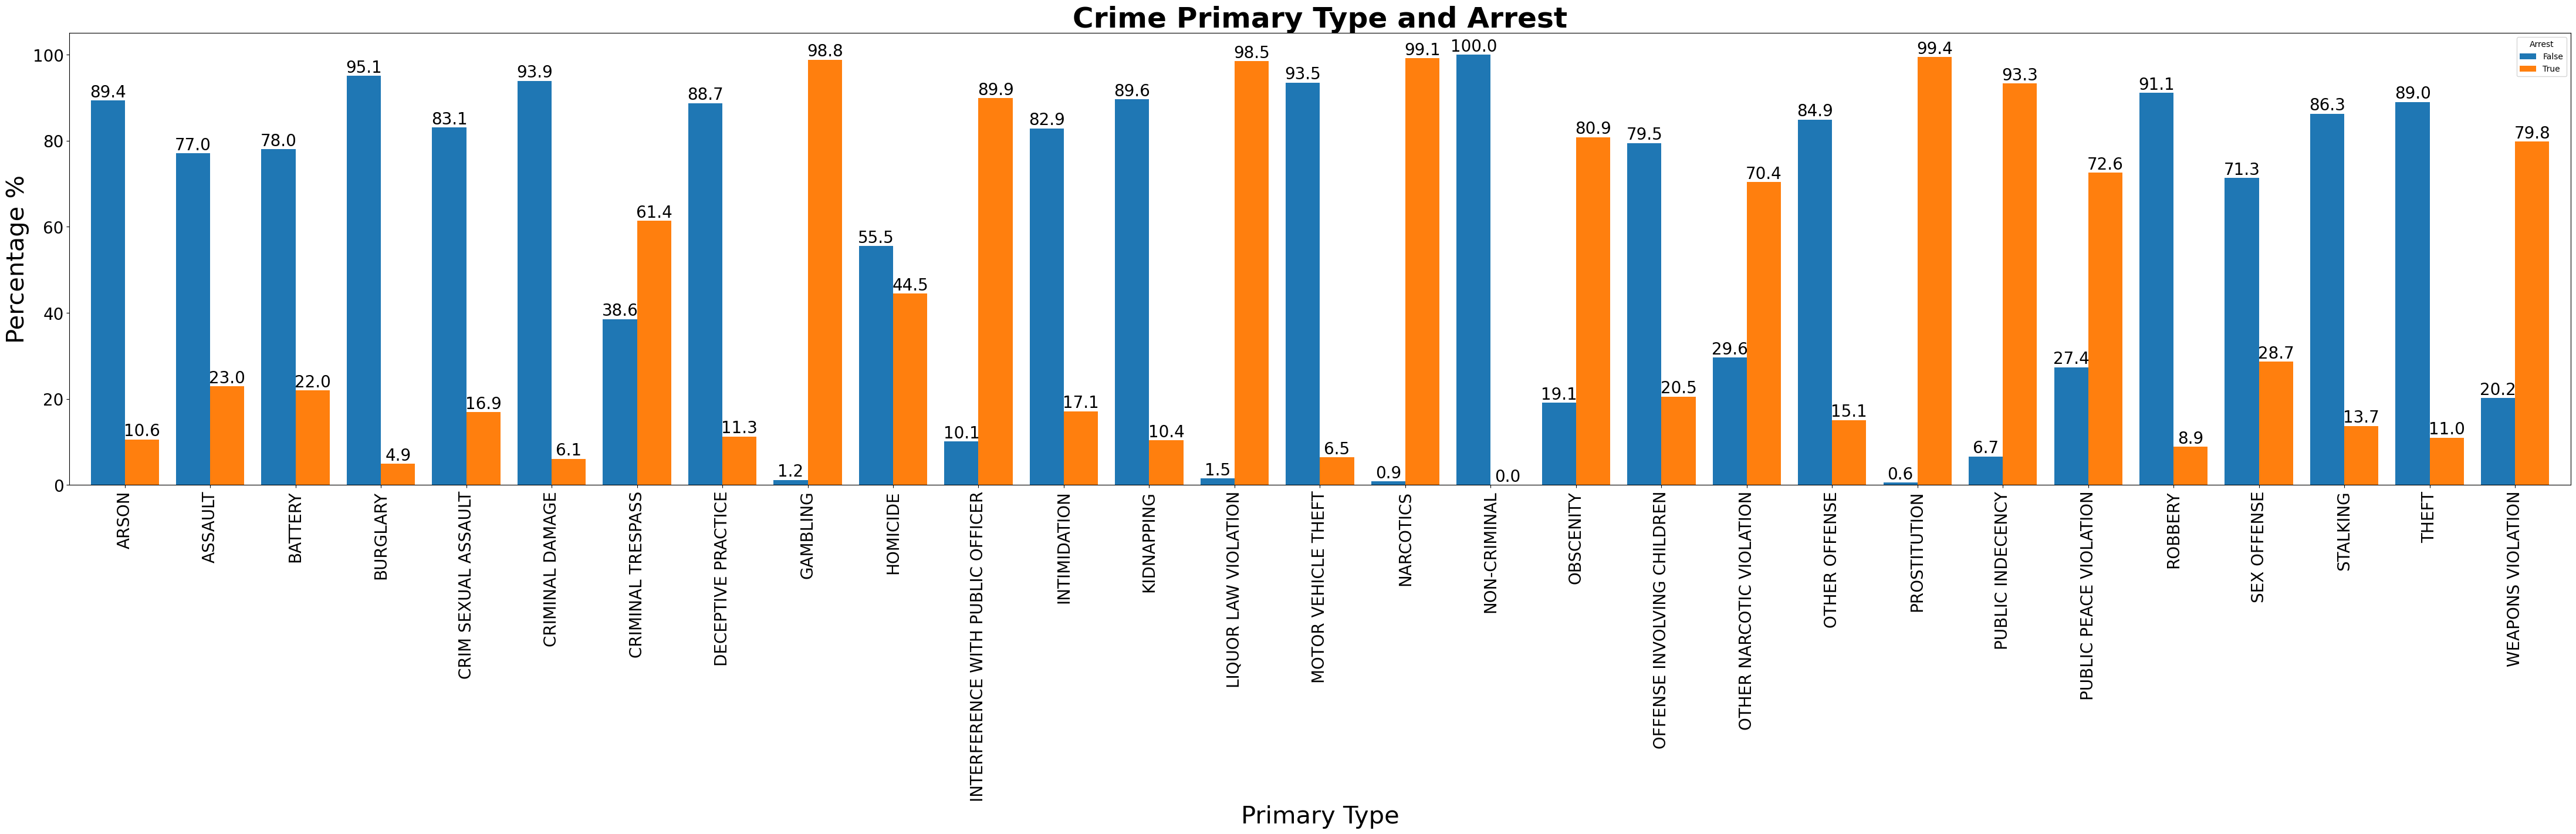

In [54]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Arrest"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (55, 10), width = 0.8)

plt.title("Crime Primary Type and Arrest", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Primary Type", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge', fontsize=20)

####  Analysing the crime type and how it increases over the years

In [55]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District', 'Year', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Primary Type,Location Description,District,Year,Arrest
0,HOMICIDE,ALLEY,3.0,2008,True
1,HOMICIDE,STREET,15.0,2008,True
3,HOMICIDE,RESTAURANT,15.0,2008,False
5,HOMICIDE,STREET,12.0,2008,True
6,HOMICIDE,STREET,10.0,2008,True
...,...,...,...,...,...
2688701,HOMICIDE,STREET,22.0,2008,True
2688702,HOMICIDE,STREET,15.0,2008,True
2688703,HOMICIDE,STREET,11.0,2008,False
2688704,HOMICIDE,STREET,11.0,2008,False


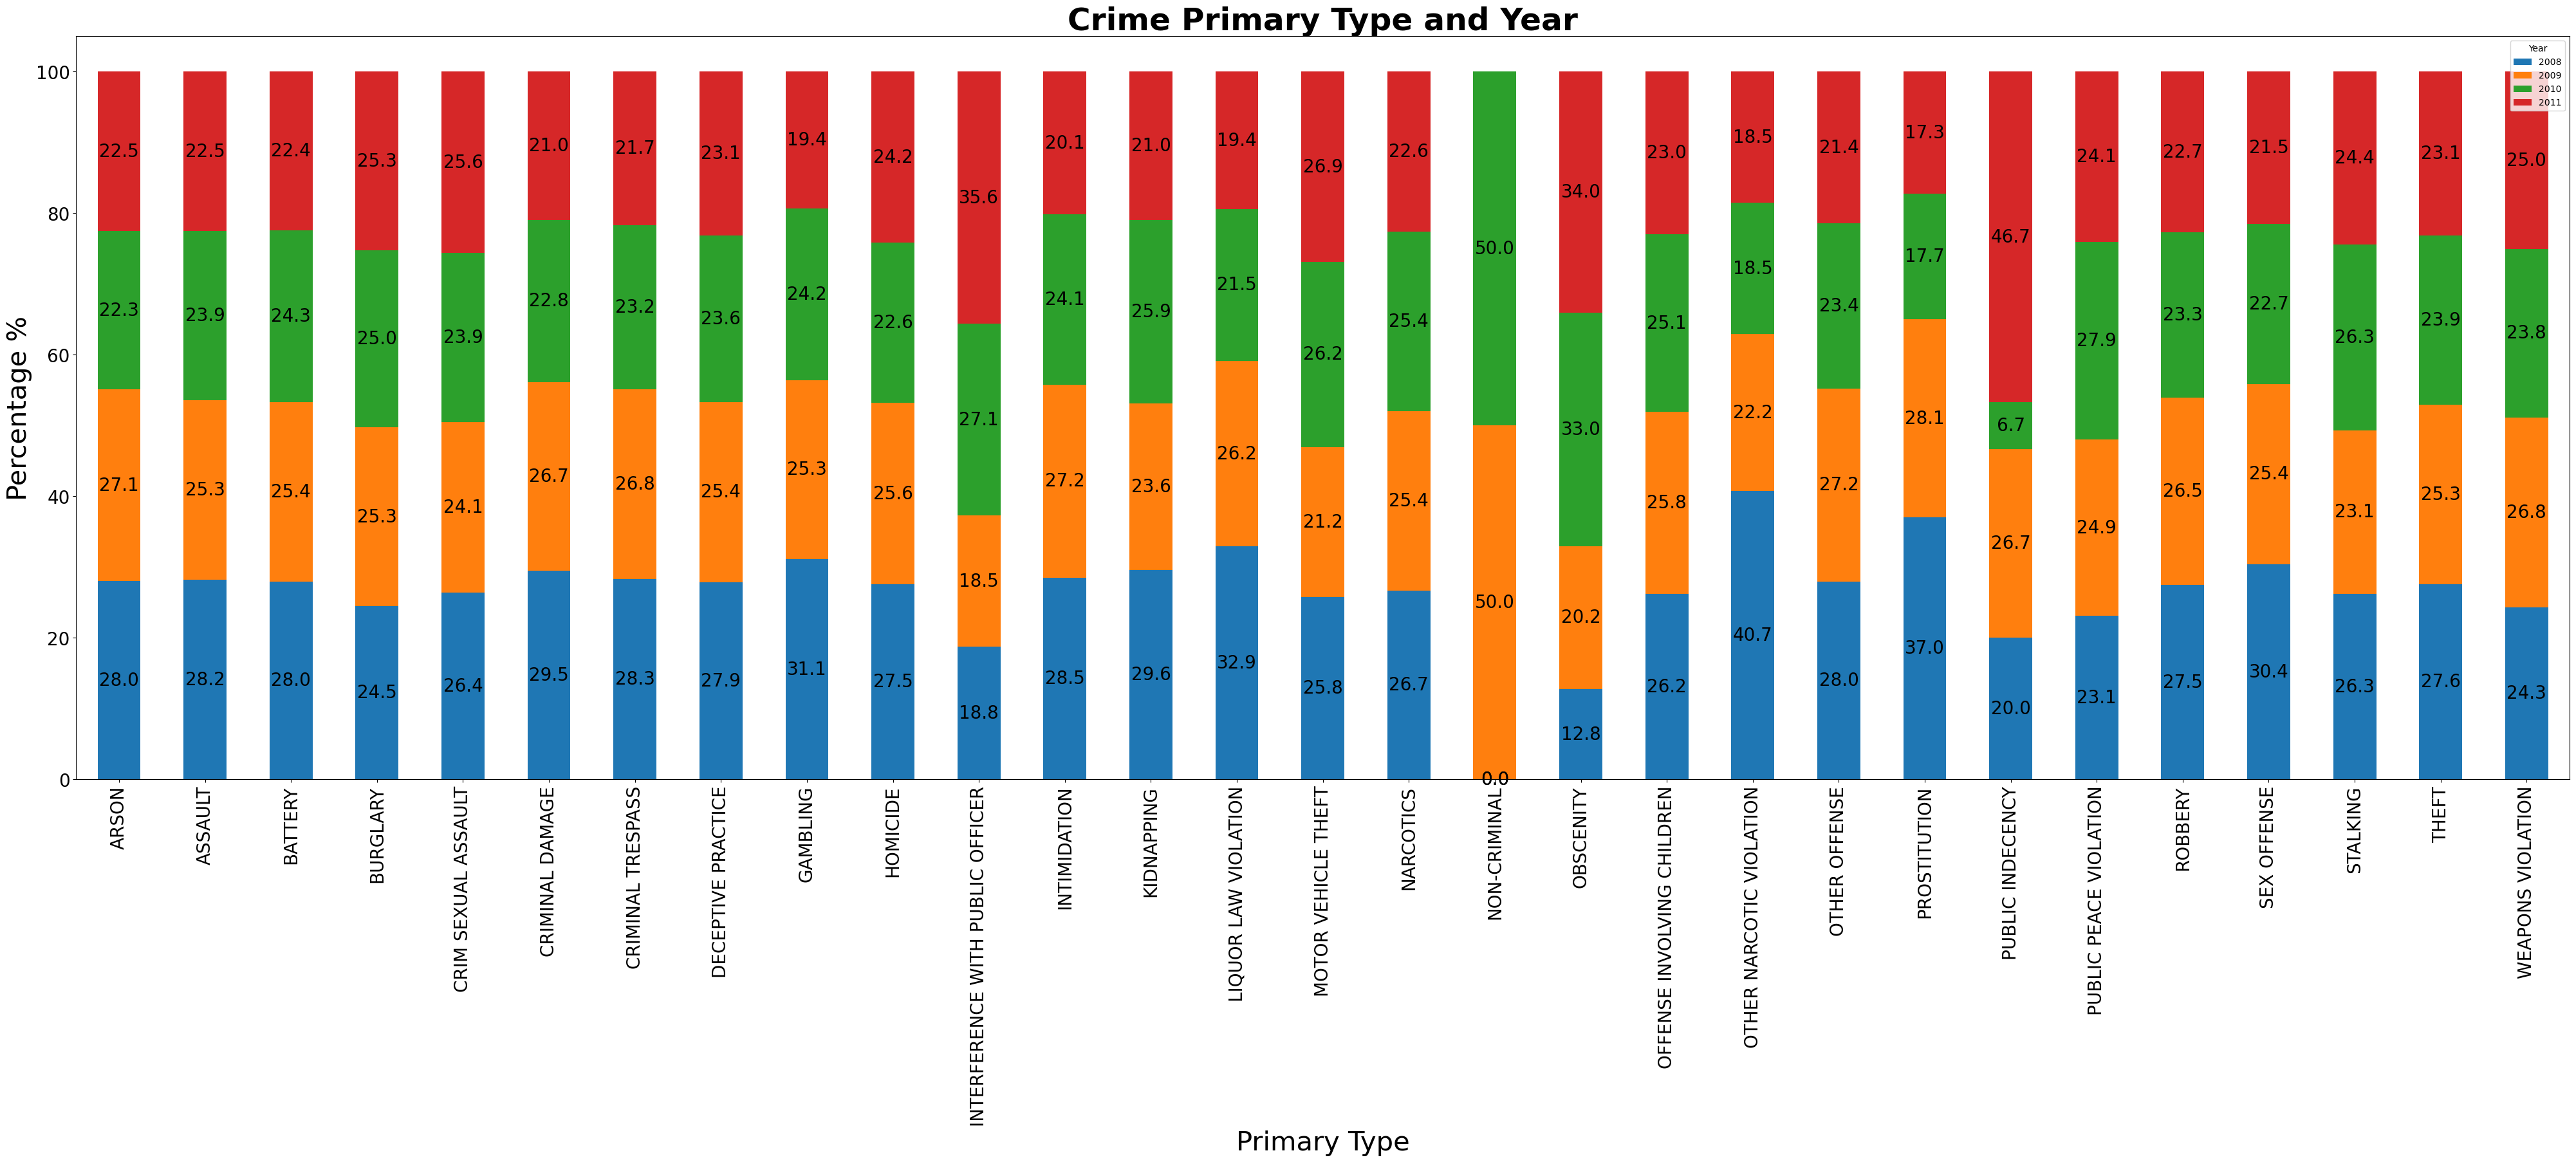

In [56]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Year"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (50, 15), stacked = True)

plt.title("Crime Primary Type and Year", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Primary Type", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### The graph above shows the crime type rate commited over the years.
#### we can note that Ritualism was recorded only. Also, non-criminal cases were only recorded on 2003

### The Arrest Distribution

In [57]:
df1.Arrest.value_counts()

Arrest
False    1123934
True      417242
Name: count, dtype: int64

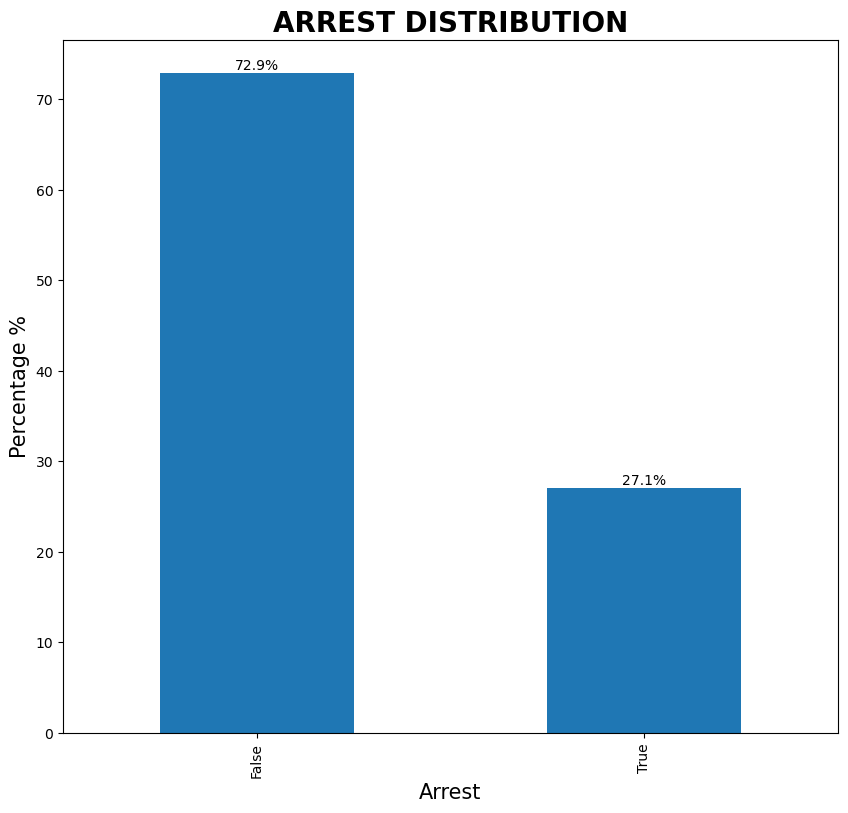

In [58]:
count = df1.Arrest.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", figsize = (10, 9))
plt.ylabel("Percentage %", fontsize = 15)
plt.xlabel("Arrest", fontsize = 15)
plt.title("ARREST DISTRIBUTION", fontsize = 20, fontweight = "bold")
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

### Analyzing the rate of Arrest during the years 

In [59]:
cross = pd.crosstab(df1.Year, df1.Arrest)
cross

Arrest,False,True
Year,,
2008,317025,109935
2009,281819,110734
2010,269709,100413
2011,255381,96160


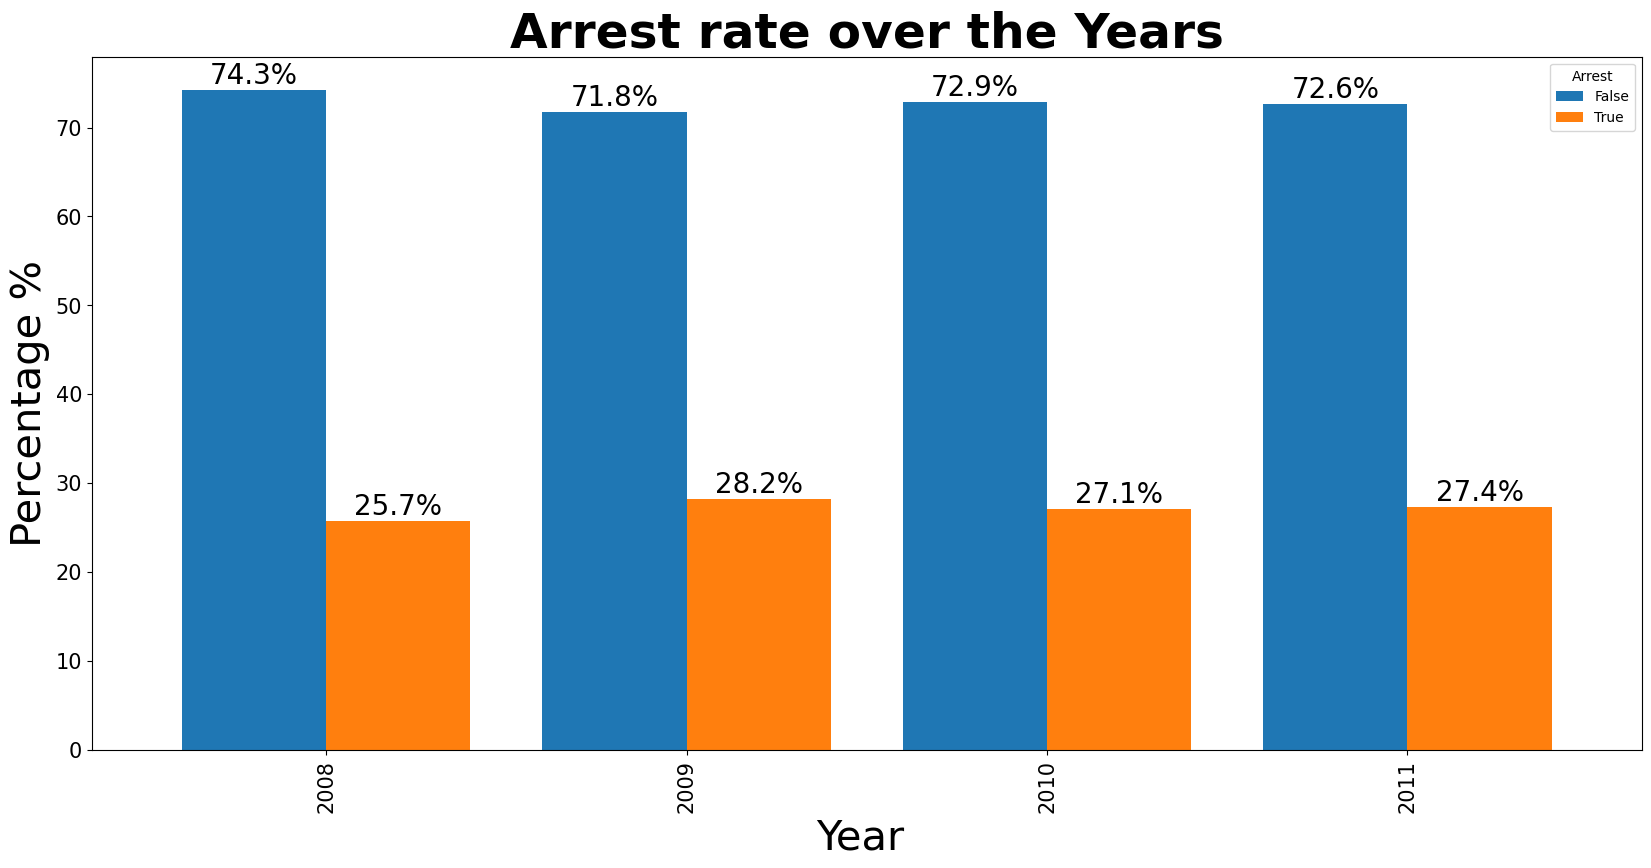

In [60]:
cross = pd.crosstab(df1.Year, df1.Arrest, normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (20, 9), width = 0.8)

plt.title("Arrest rate over the Years", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Year ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

#### Analyzing the Distrinct police that made most of the Arrest

In [61]:
pd.crosstab(df1.District, df1.Arrest)

Arrest,False,True
District,,
1.0,39053,14563
2.0,48446,17327
3.0,58029,22198
4.0,68873,21723
5.0,51860,17588
6.0,65271,26133
7.0,68393,26332
8.0,83660,27612
9.0,54312,22974


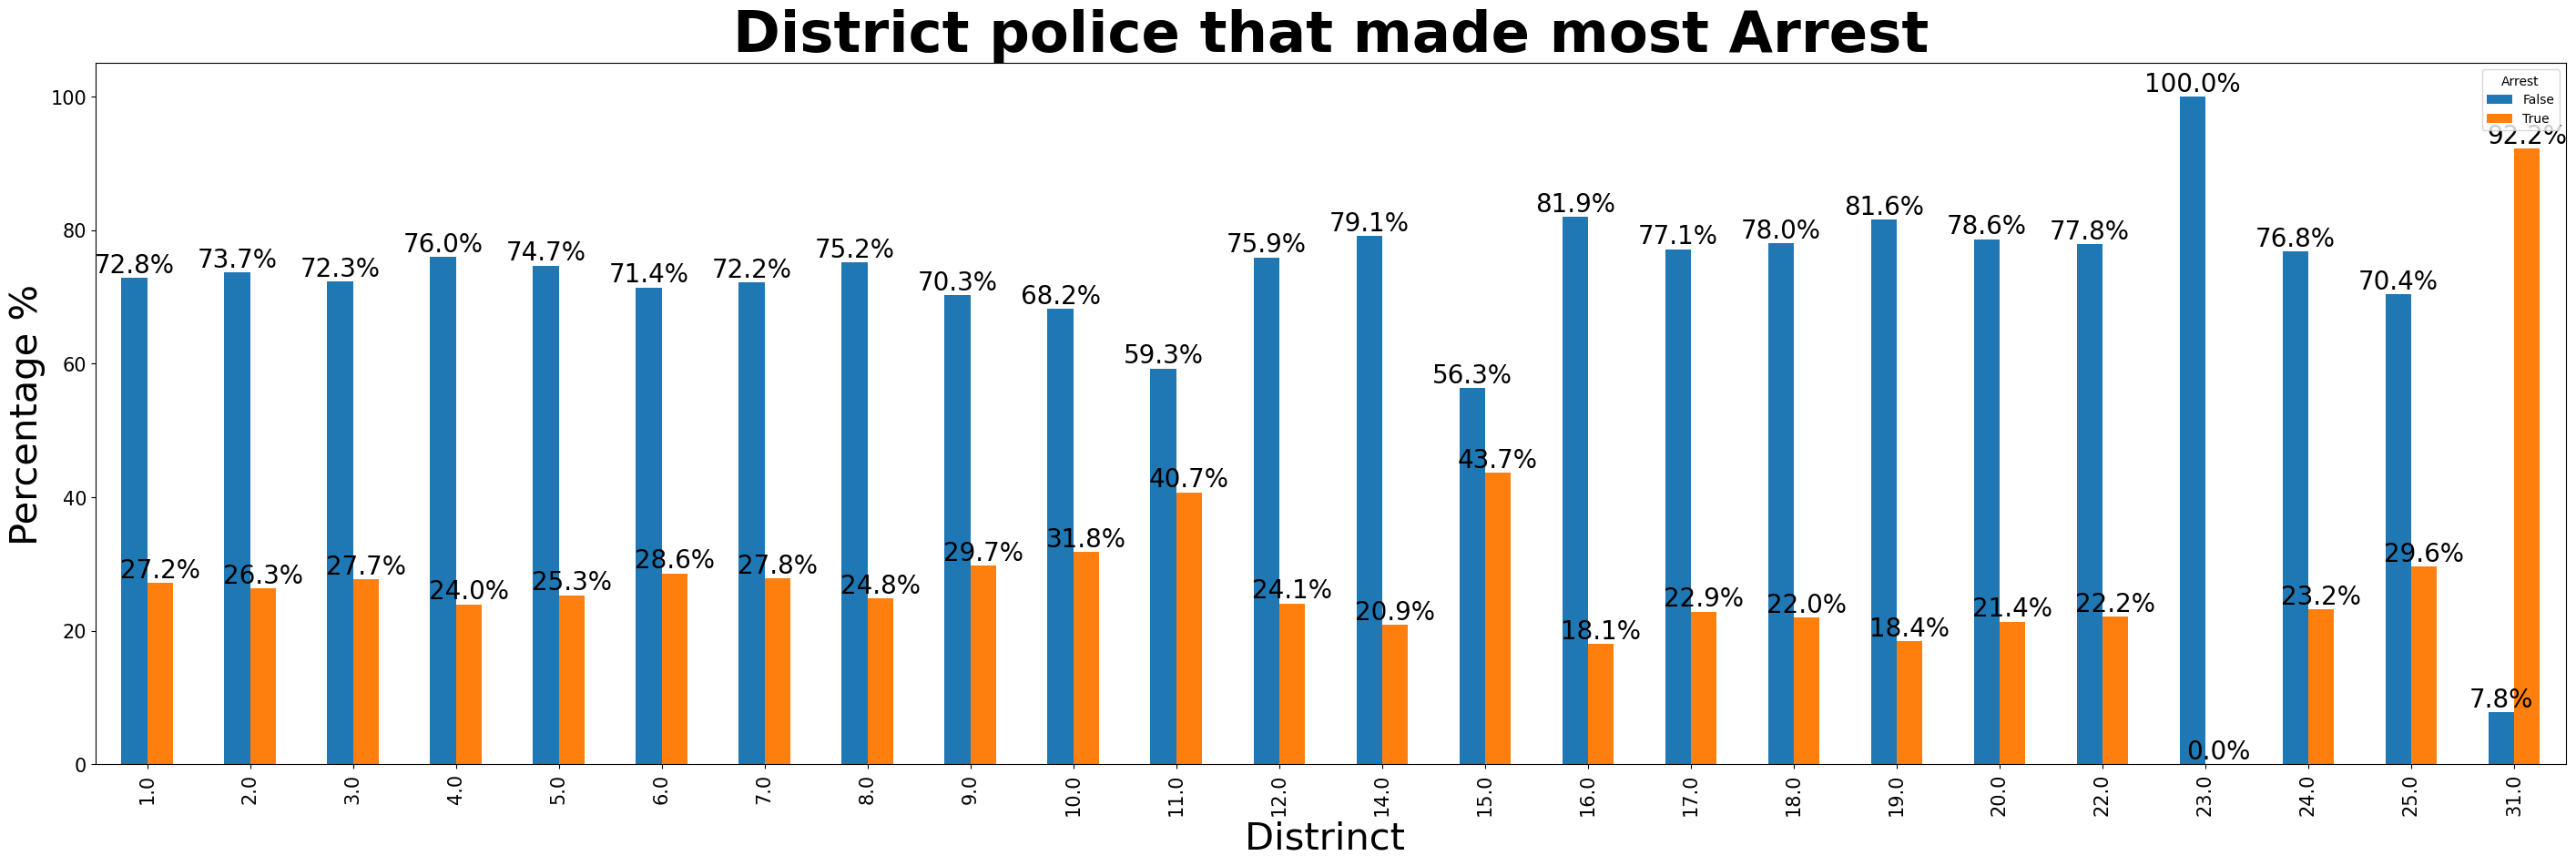

In [62]:
# cross = pd.crosstab(df1.District, df1.Arrest, normalize = "index").iloc[:, [1]]*100
cross = pd.crosstab(df1.District, df1.Arrest, normalize = "index")*100

bars = cross.plot(kind = "bar", figsize = (35, 10))

plt.title("District police that made most Arrest", fontsize = 45, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Distrinct ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

### analyzing the ward where most arrest was made

In [63]:
cross = pd.crosstab(df1.Ward, df1.Arrest)
cross

Arrest,False,True
Ward,,
1.0,23924,6010
2.0,39524,15967
3.0,28821,14131
4.0,20551,5939
5.0,28099,8835
6.0,37745,13459
7.0,31168,11014
8.0,32552,9384
9.0,28601,10061


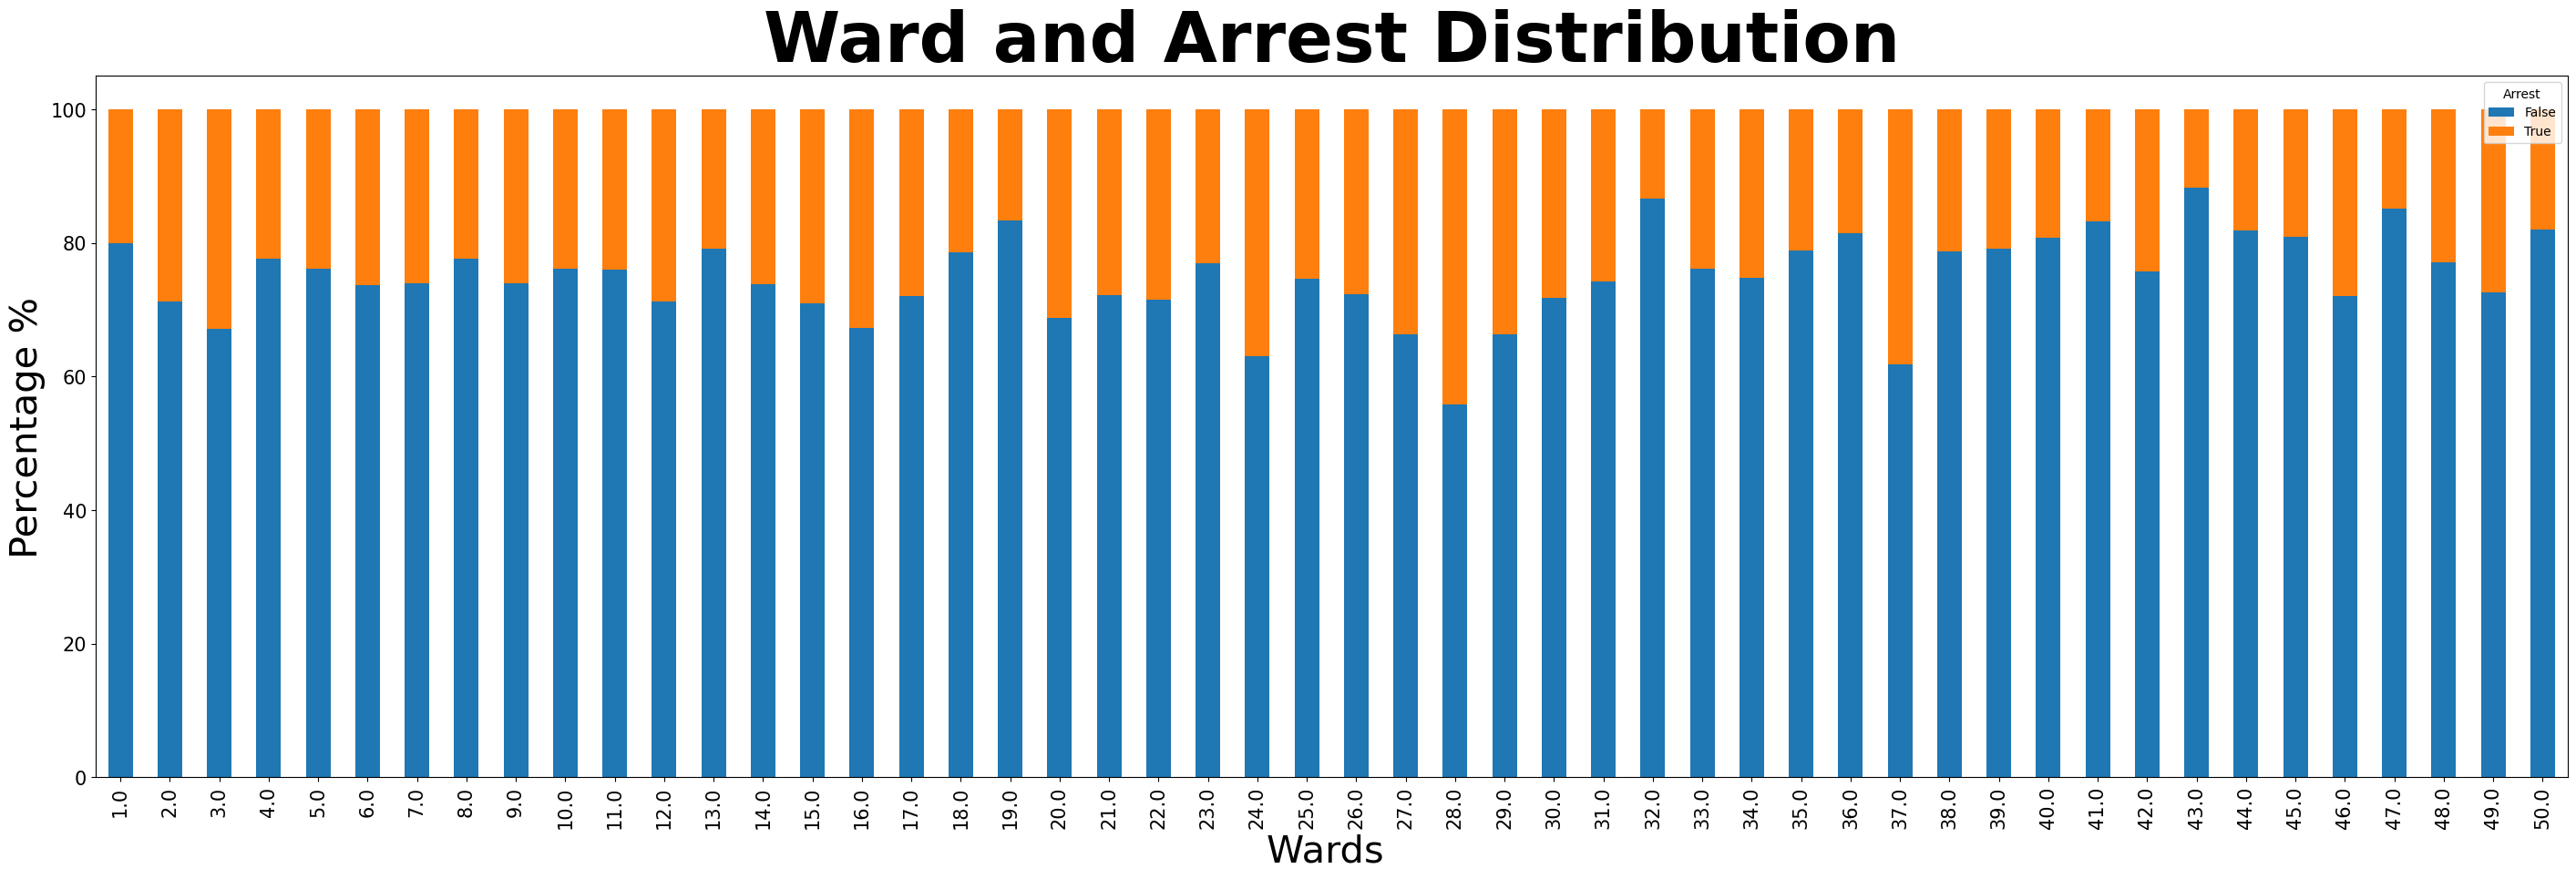

In [64]:
cross = pd.crosstab(df1.Ward, df1.Arrest, normalize = "index") * 100

bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Ward and Arrest Distribution", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### Analyzing the police district that makes most arrests(ie Arrest == True) in different wards

In [65]:
selected_col = df1[[ 'Ward', 'District', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
# filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

filtered_df = selected_col[selected_col['Arrest'] == True]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Ward,District,Arrest
0,6.0,3.0,True
1,24.0,15.0,True
5,2.0,12.0,True
6,25.0,10.0,True
14,24.0,11.0,True
...,...,...,...
2688700,24.0,10.0,True
2688701,34.0,22.0,True
2688702,28.0,15.0,True
2688707,5.0,3.0,True


In [66]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District)
cross.iloc[:5]

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,22.0,24.0,25.0,31.0
Ward,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,360,0,0,0,0,1
2.0,6323,378,0,0,0,0,0,0,0,0,...,0,0,0,4,1,0,0,0,0,0
3.0,2142,8040,0,0,0,0,794,0,3155,0,...,0,0,0,0,0,0,0,0,0,0
4.0,117,5822,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,606,7754,471,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


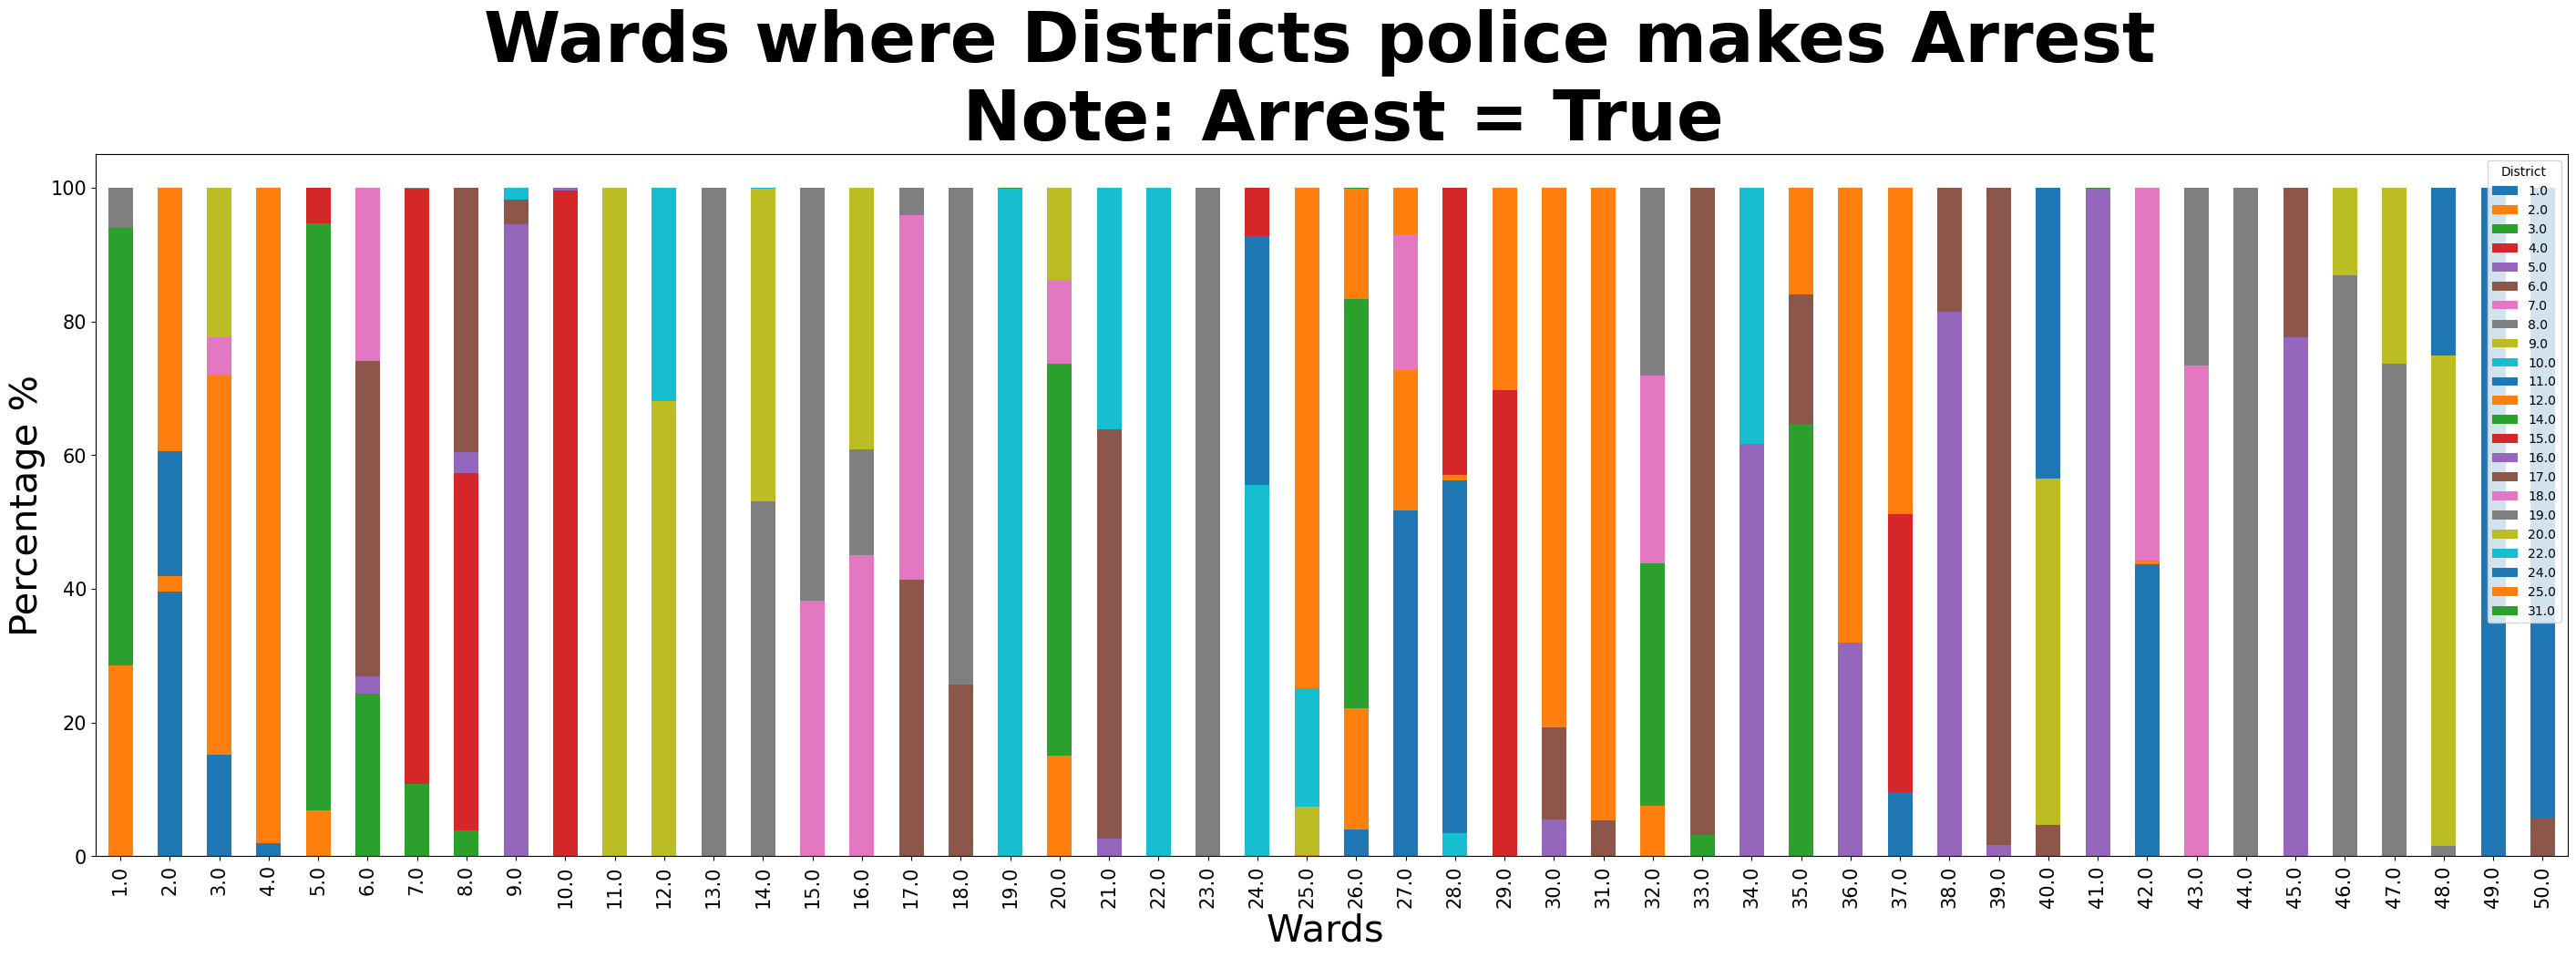

In [67]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District, normalize = "index") *100


bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Wards where Districts police makes Arrest \n Note: Arrest = True", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### Analyzing the Wards where the district police do not make Arrest (Arrest == False)

In [68]:
selected_col = df1[[ 'Ward', 'District', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
# filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

filtered_df = selected_col[selected_col['Arrest'] == False]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

,Ward,District,Arrest
2,18.0,8.0,False
3,37.0,15.0,False
4,22.0,10.0,False
7,5.0,3.0,False
8,16.0,8.0,False
...,...,...,...
2688703,27.0,11.0,False
2688704,28.0,11.0,False
2688705,10.0,4.0,False
2688706,10.0,4.0,False


In [69]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District)
cross.iloc[:5]

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,16.0,17.0,18.0,19.0,20.0,22.0,23.0,24.0,25.0,31.0
Ward,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,794,0,0,0,0,0,0
2.0,19005,893,0,0,0,0,0,0,1,0,...,0,0,6,0,0,0,0,0,0,0
3.0,2853,18661,0,0,0,0,1611,0,5696,0,...,0,0,0,0,0,0,0,0,0,0
4.0,693,19854,0,0,0,0,0,0,3,0,...,0,0,0,1,0,0,0,0,0,0
5.0,0,3870,22820,1395,0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


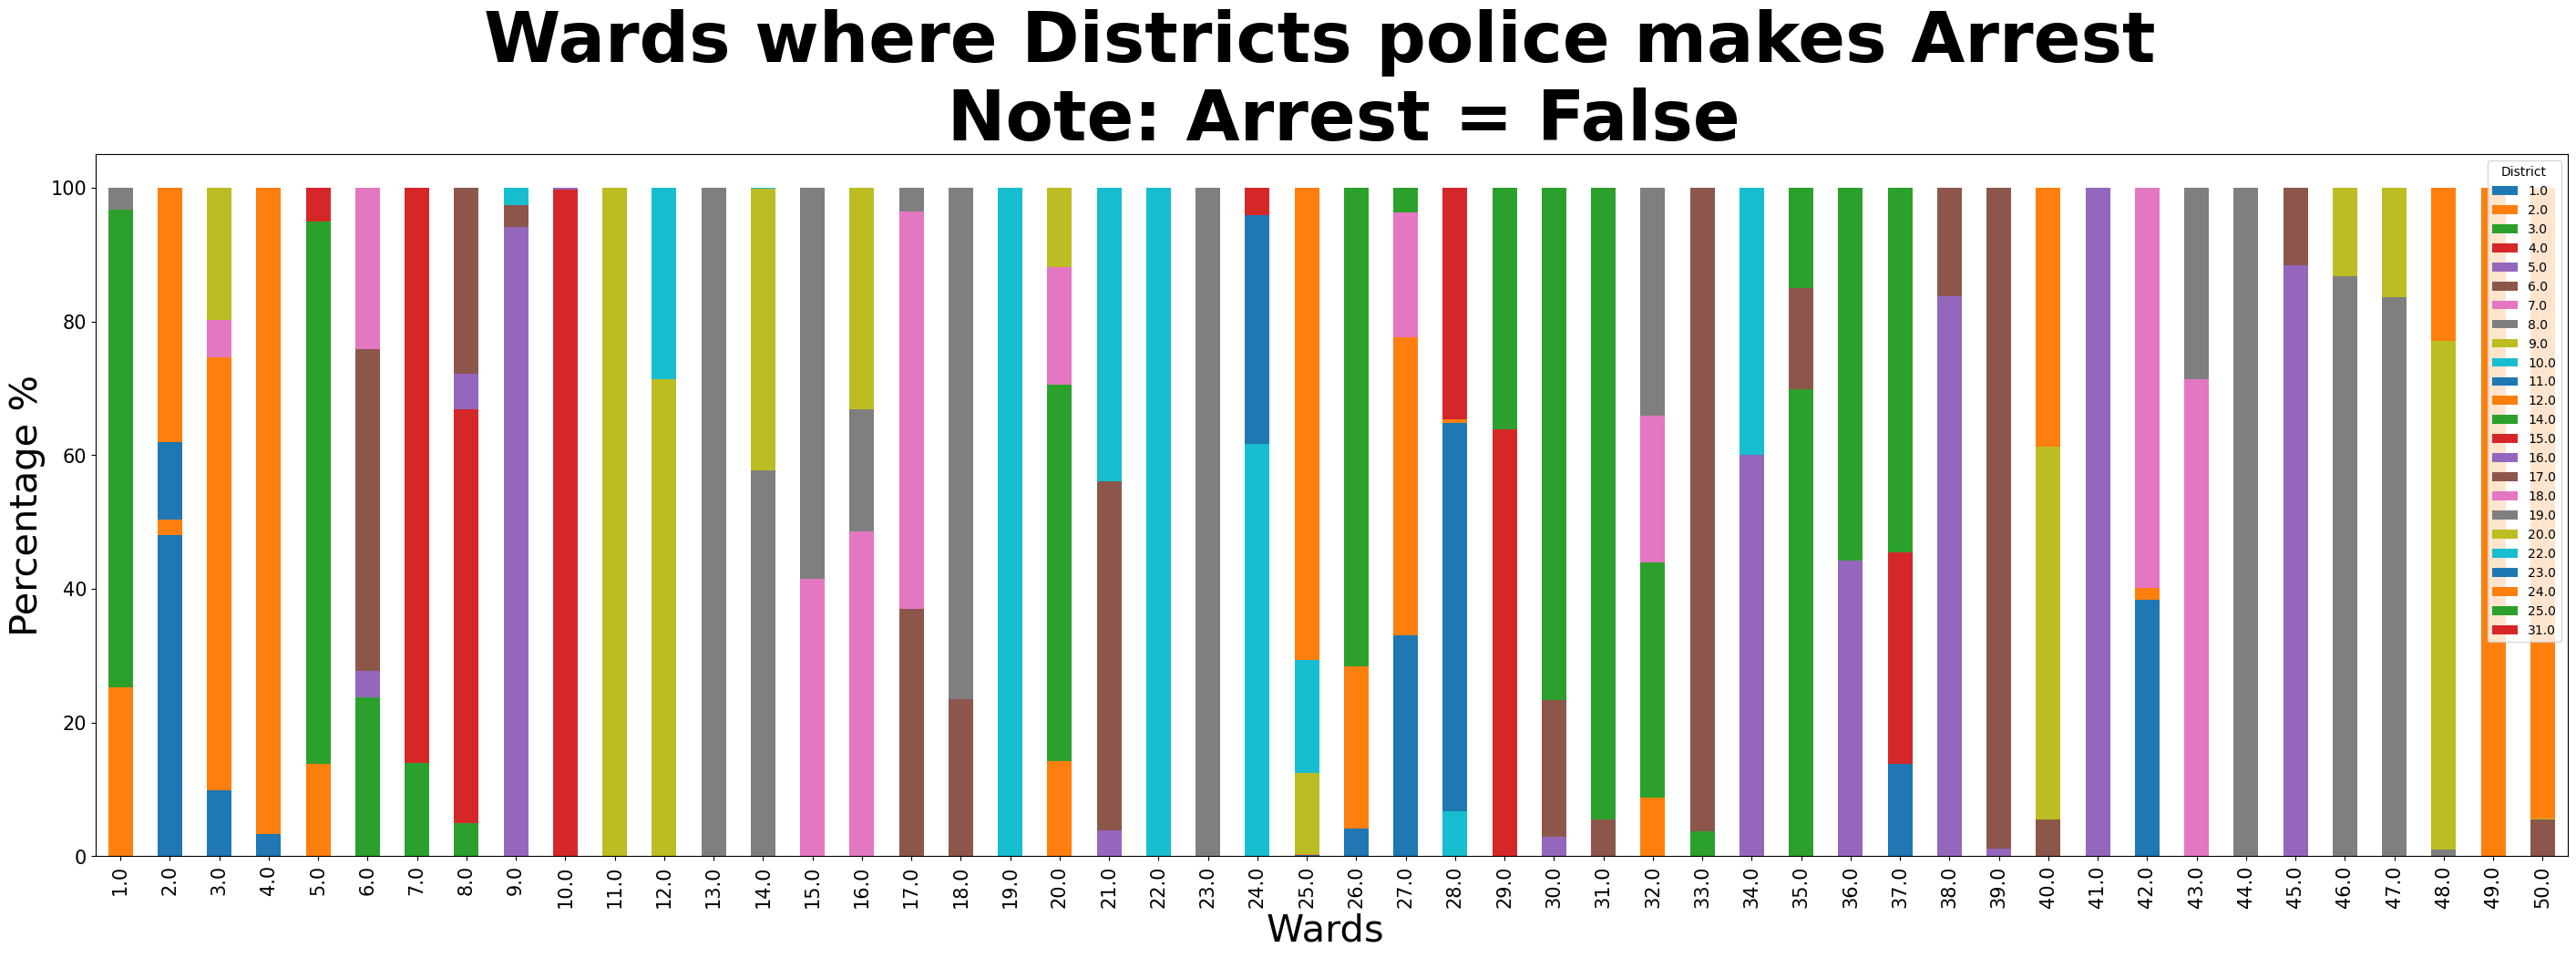

In [70]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District, normalize = "index") *100


bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Wards where Districts police makes Arrest \n Note: Arrest = False", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)